# Oakland Race and Equity Main 

This where consolidated cleaning and data exploration for the project will take place.

## Import Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import plotly.express as px
from plotly import graph_objects as go
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from numpy import mean
import imblearn
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
def cleanData(person_df, household_df, post2018 = True):
    person_df = person_df
    household_df = household_df
    pFeatures = ["SERIALNO", "SPORDER", "PUMA", "PWGTP", "AGEP", "CIT", "COW", "ENG", "FER", "JWMNP"
               , "MAR", "MIL", "SCH", "SCHL", "SEX", "PAP", "INTP", "SSIP", "SSP", "WAGP"
               , "OIP", "RETP", "SEMP", "PERNP", "PINCP", "WKL", "DIS", "ESR", "HICOV", "HISP"
               , "PAOC", "POVPIP", "RAC1P", "RACASN", "RACBLK", "RACWHT", "RACSOR", "SCIENGP", "WKHP"
               , "SOCP"]
    if post2018:
        pFeatures = pFeatures + ["RELSHIPP", "JWTRNS", "WKWN"]
    else:
        pFeatures = pFeatures + ["RELP", "JWTR", "WKW"]
    hFeatures = ["SERIALNO", "PUMA", "NP", "ACCESS", "ACR", "BATH", "FS", "ELEP", "FULP", "GASP", "HISPEED"
              , "LAPTOP", "RNTP", "RWATPR", "TEN", "VALP", "VEH", "WATP", "HINCP", "HUPAC", "KIT", "PLM"
              , "GRPIP", "RMSP"]
    person_df = person_df.loc[:, pFeatures].copy()
    household_df = household_df.loc[:, hFeatures].copy()
    person_df = person_df.loc[(person_df["PUMA"] > 101) & (person_df["PUMA"] <= 105)].copy()
    household_df = household_df.loc[(household_df["PUMA"] > 101) & (household_df["PUMA"] <= 105)].copy()
    person_df.loc[(person_df.RAC1P == 1) & (person_df.HISP == 1), "RACE"] = "White"
    person_df.loc[(person_df.RAC1P == 2) & (person_df.HISP == 1), "RACE"] = "African American"
    person_df.loc[(person_df.RAC1P == 6) & (person_df.HISP == 1), "RACE"] = "Asian"
    person_df.loc[(person_df.RAC1P.isin([3, 4, 5, 7, 8, 9])) & (person_df.HISP == 1), "RACE"] = "Other"
    person_df.loc[person_df.HISP != 1, "RACE"] = "Latino"
    person_df = person_df.merge(household_df, how = 'left', on = 'SERIALNO').copy()
    person_df = person_df.reindex(person_df.index.repeat(person_df.PWGTP)).reset_index(drop=True).drop(['PWGTP', 'PUMA_y'], axis=1).rename(columns={"PUMA_x": "PUMA"}).copy()
    return person_df

In [3]:
def getSize(df, showDim = False, name = ""):
    if name != "":
        name = name + " "
    if showDim:
        print("Dimensions for the " + name + "dataset: " + str(df.shape))
    print("New DataFrame size: " + str(int(df.memory_usage(index=True).sum()/1000000)) + " MB")

In [4]:
pca191 = pd.read_csv("2019pCA1.csv")
hca191 = pd.read_csv("2019hCA1.csv")
pca191_Ok = cleanData(pca191, hca191)
del pca191, hca191

pca181 = pd.read_csv("2018pCA1.csv")
hca181 = pd.read_csv("2018hCA1.csv")
pca181_Ok = cleanData(pca181, hca181, False)
del pca181, hca181

pca161 = pd.read_csv("2016pCA1.csv")
hca161 = pd.read_csv("2016hCA1.csv")
pca161_Ok = cleanData(pca161, hca161, False)
del pca161, hca161

pca191_5 = pd.read_csv("2019pCA5.csv")
hca191_5 = pd.read_csv("2019hCA5.csv")
pca191_5_Ok = cleanData(pca191_5, hca191_5)
del pca191_5, hca191_5

## Visualization

ESR != NA, 6
Sex = 1.male 2. female

In [414]:
dfC1 = pca191_Ok.loc[(pca191_Ok["ESR"] != 6) & (pca191_Ok["ESR"].notna()), ["RACE", "SEX", "PINCP"]]

In [415]:
print(dfC1.shape)
dfC1.head()

(353615, 3)


RACE  SEX    PINCP
13    Asian    1  17000.0
14    Asian    1  17000.0
15    Asian    1  17000.0
16    Asian    1  17000.0
488  Latino    1   4000.0

In [416]:
#test.columns = test.columns.droplevel(0)

In [417]:
chartData =  dfC1.groupby(["RACE", "SEX"], as_index=False).mean()
chartData

RACE  SEX          PINCP
0  African American    1   61446.762978
1  African American    2   45716.037466
2             Asian    1   86167.891359
3             Asian    2   66817.286606
4            Latino    1   54495.465484
5            Latino    2   45557.710819
6             Other    1   66765.677994
7             Other    2   65432.998958
8             White    1  126370.640991
9             White    2   89257.884836

In [418]:
#Adjust for inflation

In [419]:
dfC2 = pca161_Ok.loc[(pca161_Ok["ESR"] != 6) & (pca161_Ok["ESR"].notna()), ["RACE", "SEX", "PINCP"]]

In [420]:
chartData2 =  dfC2.groupby(["RACE", "SEX"], as_index=False).mean()
chartData2

RACE  SEX          PINCP
0  African American    1   42461.226681
1  African American    2   40919.405369
2             Asian    1   63415.476508
3             Asian    2   47197.173080
4            Latino    1   43641.212977
5            Latino    2   38171.069645
6             Other    1   60186.629597
7             Other    2   53560.465972
8             White    1  109467.828447
9             White    2   76389.797066

In [421]:
fig1 = go.Figure(
    data = [
        go.Bar(
            name="Male 2016",
            x=chartData2.RACE.unique(),
            y=chartData2.loc[chartData2["SEX"] ==1, "PINCP"],
            offsetgroup=0,
        ),
        go.Bar(
            name="Female 2016",
            x=chartData2.RACE.unique(),
            y=chartData2.loc[chartData2["SEX"] ==2, "PINCP"],
            offsetgroup=0,
        ),
                go.Bar(
            name="Male 2019",
            x=chartData.RACE.unique(),
            y=chartData.loc[chartData["SEX"] ==1, "PINCP"],
            offsetgroup=1,
        ),
        go.Bar(
            name="Female 2019",
            x=chartData.RACE.unique(),
            y=chartData.loc[chartData["SEX"] ==2, "PINCP"],
            offsetgroup=1,
            #base=grouped_single.loc[grouped_single["Sex"] ==1, "Wages"],
        ),
    ],
    layout=go.Layout(
        #barmode='stack',
        title="Income vs Ethnicty and Gender (2016 vs 2018)",
        yaxis_title="Average Yearly Income",
        xaxis_title="Ethnicity"
    )
)

In [422]:
fig1.show()

# Logistic Regression

I'll start by taking a look at the features in our cleaned dataset.

## Data Exploration and Cleaning

In [423]:
pca191_Ok.columns

Index(['SERIALNO', 'SPORDER', 'PUMA', 'AGEP', 'CIT', 'COW', 'ENG', 'FER',
       'JWMNP', 'MAR', 'MIL', 'SCH', 'SCHL', 'SEX', 'PAP', 'INTP', 'SSIP',
       'SSP', 'WAGP', 'OIP', 'RETP', 'SEMP', 'PERNP', 'PINCP', 'WKL', 'DIS',
       'ESR', 'HICOV', 'HISP', 'PAOC', 'POVPIP', 'RAC1P', 'RACASN', 'RACBLK',
       'RACWHT', 'RACSOR', 'SCIENGP', 'WKHP', 'SOCP', 'RELSHIPP', 'JWTRNS',
       'WKWN', 'RACE', 'NP', 'ACCESS', 'ACR', 'BATH', 'FS', 'ELEP', 'FULP',
       'GASP', 'HISPEED', 'LAPTOP', 'RNTP', 'RWATPR', 'TEN', 'VALP', 'VEH',
       'WATP', 'HINCP', 'HUPAC', 'KIT', 'PLM', 'GRPIP', 'RMSP'],
      dtype='object')

### Choosing dependent variable

The dependent variable is if an individual needs government aid.

An individual who needs government aid, is anyone that is currently on food stamps, receiving financial aid, or receiving medic-aid. The features describing an individal are noted below.
- FS - Yearly food stamp/Supplemental Nutrition Assistance Program (SNAP) recipiency
- FFSP - Yearly food stamp/Supplemental Nutrition Assistance Program (SNAP) recipiency allocation flag
- HINS4 - Medicaid, Medical Assistance, or any kind of government-assistance plan
- PAP - Public assistance income past 12 months

### Choosing initial predictors

The following features are what I think will explain the DV the best.

- PUMA - Area code (Nominal)
- RELSHIPP - Indicator of a 'reference person'
- AGEP - Age of individual (Ratio)
- ESR - Employment status (Nominal)
- ENG - Ability to speak English (Ordinal)
- FER - Gave birth to a child in the past 12 months (Binary)
- JWMNP - Travel Time to Work (Ratio)
- JWTRNS - Means of transportation to work (Nominal)
- MIL - Military Service (Nominal)
- SCHL - Educational Attainment (Ordinal)
- SEX - Sex of Individual (Binary)
- DIS - Disability Indicator (Binary)
- HICOV - Health Insurace Indicatory (Binary)
- WKHP - Usual hours worked per week (Ratio)
- NP - Number of people in household (Interval)
- ACCESS - Access to internet (Binary)
- ELEP - Monthly Electricity Cost (Interval)
- FULP - Yearly Fuel cost (Other than Gas and Electricity) (Interval)
- GASP - Monthly Gas cost (Interval)
- RNTP - Monthly rent (Interval)
- WATP - Yearly water cost (Interval)
- PERNP - Total Person's Earnings (Ratio)

In total, there are:
- 11 Categorical Features
- 10 Numerical Features

We'll make a dataframe for the predictors and DVs.

In [424]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()


I want to only examine individuals who are in the labor force, so I will filter out people under 16 and who are not currently looking for work

In [425]:
#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

In [426]:
print(df.shape)
df.head()

(353615, 21)


PUMA  RELSHIPP  AGEP  ESR  FER  JWMNP  JWTRNS  MIL  SCHL  SEX  DIS  \
13    103        38    34  1.0  NaN   10.0    12.0  4.0  22.0    1    2   
14    103        38    34  1.0  NaN   10.0    12.0  4.0  22.0    1    2   
15    103        38    34  1.0  NaN   10.0    12.0  4.0  22.0    1    2   
16    103        38    34  1.0  NaN   10.0    12.0  4.0  22.0    1    2   
488   103        38    20  1.0  NaN    5.0    10.0  4.0  19.0    1    2   

     HICOV  WKHP  ACCESS  ELEP  FULP  GASP  RNTP  WATP    PERNP  ASSISTANCE  
13       1   8.0     NaN   NaN   NaN   NaN   NaN   NaN  17000.0         0.0  
14       1   8.0     NaN   NaN   NaN   NaN   NaN   NaN  17000.0         0.0  
15       1   8.0     NaN   NaN   NaN   NaN   NaN   NaN  17000.0         0.0  
16       1   8.0     NaN   NaN   NaN   NaN   NaN   NaN  17000.0         0.0  
488      1  12.0     NaN   NaN   NaN   NaN   NaN   NaN   4000.0         0.0

In [427]:
df.ESR.value_counts()

1.0    330261
3.0     15684
2.0      6345
4.0      1325
Name: ESR, dtype: int64

### NA Analysis

I'll print out the features that have NAs. to start cleaning them.

In [428]:
def mapNAs(df):
    noNA = True
    for feature in df.columns.values:
        if df[str(feature)].isna().sum() == 0:
            pass
        else:
            noNA = False
            print(str(feature) + " NA count: " + str(df[str(feature)].isna().sum())) 
    if noNA:
        print("No NAs")

In [429]:
mapNAs(df)

FER NA count: 226077
JWMNP NA count: 43954
JWTRNS NA count: 22029
MIL NA count: 289
WKHP NA count: 7378
ACCESS NA count: 2101
ELEP NA count: 16059
FULP NA count: 347934
GASP NA count: 206644
RNTP NA count: 166888
WATP NA count: 123006


A null in `FER` denotes a male, a child under 15, or an adult above 50. Nulls will be recoded to 2 (no).<br>
A null in `JWMNP` denotes travel time. Nulls will be recoded to 0 (No travel time).<br>
A null in `JWTRNS` denotes someone who does not travel to work, is under 16, is not in the labor force, is unemployed or is not currently at work. Nulls will be removed.<br>
A null in `MIL` means that the person is under 17 and didn't qualify for the mility, so they can be recoded as 4, meaning they never served in the military.
A null in `WKHP` denotes people under 16 or who haven't worked. Nulls will be recoded as zero.<br>
A null in `ELEP` denotes no electricity payment because of many different reasons. Nulls will be removed from dataset.<br>
A null in `FULP` denotes no Fuel payment for a variety of reasons. Because most inputs are null, feature will be removed.<br>
A null in `GASP` denotes no Gas payment for a variety of reasons. Because over half of inputs are null, feature will be removed.<br>
A null in `RNTP` denotes no rent payment for a variety of reasons. Null will be recoded to 0.<br>
A null in `WATP` denotes no water payment for a variety of reasons. Null will be recoded to 0.

In [430]:
df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

Sanity Check for NA values

In [431]:
mapNAs(df)

No NAs


No more NAs!

In [432]:
print(df.shape)
df.head()

(317190, 19)


PUMA  RELSHIPP  AGEP  ESR  FER  JWMNP  JWTRNS  MIL  SCHL  SEX  DIS  \
6848   104        20    39  1.0  2.0   45.0     1.0  4.0  24.0    2    2   
6849   104        20    39  1.0  2.0   45.0     1.0  4.0  24.0    2    2   
6850   104        20    39  1.0  2.0   45.0     1.0  4.0  24.0    2    2   
6851   104        20    39  1.0  2.0   45.0     1.0  4.0  24.0    2    2   
6852   104        20    39  1.0  2.0   45.0     1.0  4.0  24.0    2    2   

      HICOV  WKHP  ACCESS  ELEP  RNTP    WATP     PERNP  ASSISTANCE  
6848      1  40.0     1.0  90.0   0.0  1600.0  180000.0         0.0  
6849      1  40.0     1.0  90.0   0.0  1600.0  180000.0         0.0  
6850      1  40.0     1.0  90.0   0.0  1600.0  180000.0         0.0  
6851      1  40.0     1.0  90.0   0.0  1600.0  180000.0         0.0  
6852      1  40.0     1.0  90.0   0.0  1600.0  180000.0         0.0

In total, there are:

- 11 Categorical Features
- 7 Numerical Features

In [433]:
df.ASSISTANCE.value_counts()

0.0    295534
1.0     21656
Name: ASSISTANCE, dtype: int64

Our predictor is very unbalanced, so we will use a undersampling to compensate

### Oversample or undersample

In [434]:
y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

In [437]:
X.head()

PUMA  RELSHIPP  AGEP  ESR  FER  JWMNP  JWTRNS  MIL  SCHL  SEX  DIS  \
6848   104        20    39  1.0  2.0   45.0     1.0  4.0  24.0    2    2   
6849   104        20    39  1.0  2.0   45.0     1.0  4.0  24.0    2    2   
6850   104        20    39  1.0  2.0   45.0     1.0  4.0  24.0    2    2   
6851   104        20    39  1.0  2.0   45.0     1.0  4.0  24.0    2    2   
6852   104        20    39  1.0  2.0   45.0     1.0  4.0  24.0    2    2   

      HICOV  WKHP  ACCESS  ELEP  RNTP    WATP     PERNP  
6848      1  40.0     1.0  90.0   0.0  1600.0  180000.0  
6849      1  40.0     1.0  90.0   0.0  1600.0  180000.0  
6850      1  40.0     1.0  90.0   0.0  1600.0  180000.0  
6851      1  40.0     1.0  90.0   0.0  1600.0  180000.0  
6852      1  40.0     1.0  90.0   0.0  1600.0  180000.0

In [438]:
y.head()

6848    0.0
6849    0.0
6850    0.0
6851    0.0
6852    0.0
Name: ASSISTANCE, dtype: float64

In [439]:
# summarize class distribution
print(Counter(y))
o = 0.3
u = 0.9
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

Counter({0.0: 295534, 1.0: 21656})
Counter({0.0: 295534, 1.0: 88660})
Counter({0.0: 98511, 1.0: 88660})


In [29]:
model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=99)
scores_roc = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores_F1 = cross_val_score(model, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores_roc))
print('F1 Score: %.3f' % mean(scores_F1))

Mean ROC AUC: 1.000
F1 Score: 1.000


In [ ]:
model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=99)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
# define pipeline
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

In [ ]:
print(Counter(y))

In [ ]:
classes = np.unique(y)
total = len(y)
for c in classes:
	n_examples = len(y[y==c])
	percent = n_examples / total * 100
	print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)
kf = KFold(n_splits=5, random_state=42, shuffle=True)
rf = RandomForestClassifier(n_estimators=100, random_state=13)
cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')

In [ ]:
params = {
    'n_estimators': 50,
    'max_depth': 4,
    'random_state': [13]
}

grid_no_up = GridSearchCV(rf, param_grid=params, cv=kf, 
                          scoring='recall').fit(X_train, y_train)

grid_no_up.best_score_

## Feature Selection

#### Numerical Features

 Test for collinearity

In [440]:
df = pd.concat([y,X], axis = 1, join = "inner")

In [441]:
numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()

In [442]:
numerical.describe()

AGEP          JWMNP           WKHP           ELEP  \
count  187171.000000  187171.000000  187171.000000  187171.000000   
mean       40.597924      31.737433      37.501985     126.864065   
std        13.031490      24.565990      12.937056      96.710278   
min        16.000000       0.000000       1.000000       4.000000   
25%        30.000000      15.000000      32.000000      60.000000   
50%        39.000000      30.000000      40.000000     100.000000   
75%        50.000000      45.000000      40.000000     170.000000   
max        94.000000     142.000000      99.000000     650.000000   

                RNTP           WATP          PERNP  
count  187171.000000  187171.000000  187171.000000  
mean     1098.279541     720.607701   59508.920666  
std      1131.096162     778.143181   70180.720150  
min         0.000000       0.000000   -5100.000000  
25%         0.000000       0.000000   20000.000000  
50%       960.000000     540.000000   39600.000000  
75%      2100.000000    1200.000000   74000.000000  
max      3900.000000    4100.000000  691000.000000

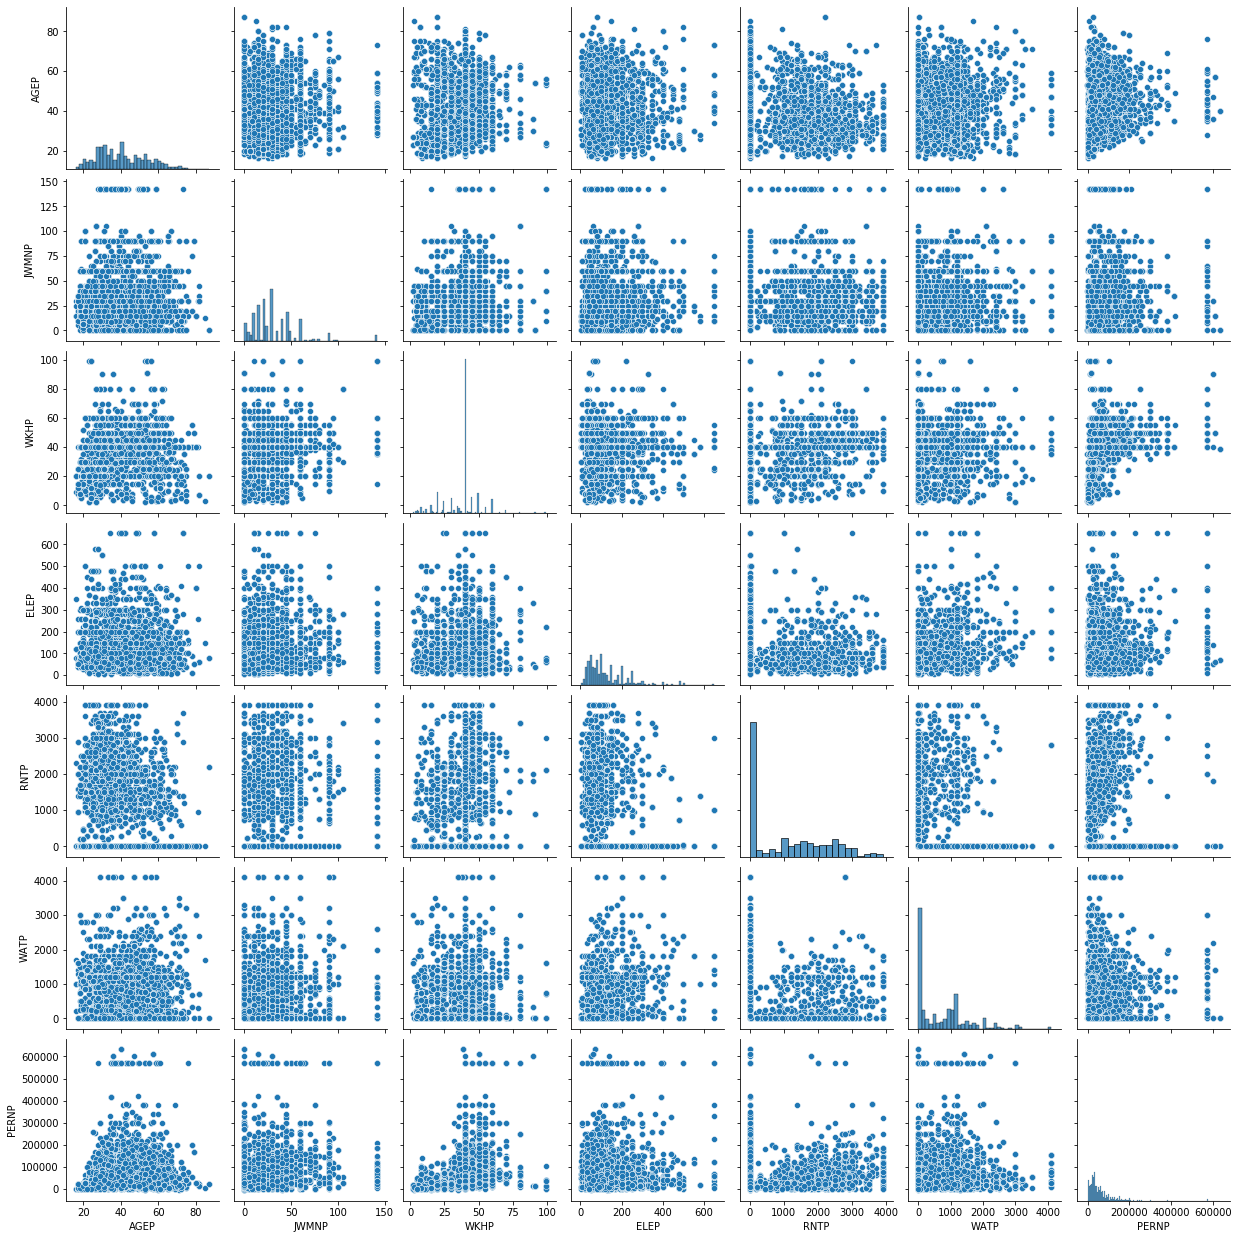

In [443]:
sns.pairplot(numerical.sample(10000))

None of my predictors appear to be correlated with each other.

In [34]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [35]:
calc_vif(numerical)

variables       VIF
0      AGEP  6.664630
1     JWMNP  2.527893
2      WKHP  8.627181
3      ELEP  2.861150
4      RNTP  1.885402
5      WATP  2.026434
6     PERNP  2.020091

VIFs are pretty low. Confirm no collinearity.

#### Categorical Features

In [36]:
cat = df.loc[:,['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']].copy()

In [37]:
for col in cat:
    cat[col] = cat[col].astype('category')

In [38]:
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

In [39]:
# split 70-30
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

In [40]:
#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [41]:
len(X_train.columns)

52

## RFE decision tree

In [42]:
X_train.columns

Index(['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP', 'PUMA_103',
       'PUMA_104', 'PUMA_105', 'ESR_4.0', 'JWTRNS_2.0', 'JWTRNS_3.0',
       'JWTRNS_4.0', 'JWTRNS_5.0', 'JWTRNS_6.0', 'JWTRNS_7.0', 'JWTRNS_8.0',
       'JWTRNS_9.0', 'JWTRNS_10.0', 'JWTRNS_11.0', 'JWTRNS_12.0', 'FER_2.0',
       'MIL_2.0', 'MIL_3.0', 'MIL_4.0', 'SEX_2', 'SCHL_3.0', 'SCHL_5.0',
       'SCHL_6.0', 'SCHL_7.0', 'SCHL_8.0', 'SCHL_9.0', 'SCHL_10.0',
       'SCHL_11.0', 'SCHL_12.0', 'SCHL_13.0', 'SCHL_14.0', 'SCHL_15.0',
       'SCHL_16.0', 'SCHL_17.0', 'SCHL_18.0', 'SCHL_19.0', 'SCHL_20.0',
       'SCHL_21.0', 'SCHL_22.0', 'SCHL_23.0', 'SCHL_24.0', 'DIS_2', 'HICOV_2',
       'ACCESS_2.0', 'ACCESS_3.0'],
      dtype='object')

In [43]:
X_train_cat = X_train.drop(columns=["AGEP","JWMNP","WKHP","ELEP","RNTP","WATP","PERNP"])

In [44]:
len(X_train_cat.columns)

45

In [45]:
# create a cv scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#range of hypermeters
hyper_params = [{'n_features_to_select': list(range(1,45))}]

# grid search
de = DecisionTreeClassifier()
de.fit(X_train_cat, y_train)
rfe = RFE(de)

model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'balanced_accuracy', cv = folds, verbose = 1, return_train_score=True)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 44 candidates, totalling 220 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeClassifier()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [46]:
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        5.956011      0.164984         0.011962        0.000887   
1        6.315698      0.720224         0.011962        0.000631   
2        5.630327      0.329671         0.011773        0.000388   
3        5.429002      0.183354         0.011558        0.000787   
4        5.400550      0.148756         0.011578        0.000804   
5        5.368157      0.163359         0.012173        0.000752   
6        5.328425      0.180055         0.011366        0.000800   
7        5.210353      0.149884         0.012368        0.000797   
8        5.217972      0.170607         0.011974        0.000623   
9        5.187339      0.161712         0.011967        0.000623   
10       5.258749      0.144010         0.012180        0.000744   
11       5.125747      0.153827         0.012364        0.000798   
12       4.973997      0.175361         0.011571        0.000486   
13       5.037246      0.149057         0.012282        0.001178   
14       5.162225      0.285051         0.012263        0.000398   
15       4.824470      0.225482         0.011561        0.000483   
16       4.615680      0.168319         0.011965        0.001096   
17       4.714528      0.311066         0.012954        0.001256   
18       4.641728      0.235778         0.012174        0.000742   
19       4.420673      0.105341         0.012384        0.000803   
20       4.331230      0.180230         0.012152        0.000395   
21       4.289924      0.144707         0.012966        0.000632   
22       4.110364      0.117207         0.012372        0.000485   
23       4.036017      0.143839         0.012568        0.000794   
24       3.988514      0.124673         0.012582        0.000490   
25       3.788349      0.123688         0.012896        0.001104   
26       3.659078      0.109334         0.012961        0.000625   
27       3.651620      0.158606         0.012770        0.000749   
28       3.542623      0.158005         0.012356        0.000476   
29       3.608524      0.081906         0.013910        0.001622   
30       3.451123      0.115700         0.014355        0.001499   
31       3.274288      0.140917         0.014157        0.001164   
32       2.989621      0.119118         0.014165        0.001926   
33       2.859681      0.087797         0.013952        0.001672   
34       3.005272      0.133056         0.013761        0.000391   
35       2.684772      0.169732         0.013158        0.000403   
36       2.485548      0.087645         0.012572        0.000491   
37       2.314037      0.071723         0.013165        0.000399   
38       2.168618      0.066949         0.012970        0.000614   
39       2.035512      0.061392         0.012958        0.000023   
40       1.909791      0.070945         0.013576        0.001014   
41       1.815945      0.035581         0.013972        0.002089   
42       1.652045      0.139272         0.012965        0.001092   
43       1.447421      0.068161         0.013161        0.000401   

   param_n_features_to_select                        params  \
0                           1   {'n_features_to_select': 1}   
1                           2   {'n_features_to_select': 2}   
2                           3   {'n_features_to_select': 3}   
3                           4   {'n_features_to_select': 4}   
4                           5   {'n_features_to_select': 5}   
5                           6   {'n_features_to_select': 6}   
6                           7   {'n_features_to_select': 7}   
7                           8   {'n_features_to_select': 8}   
8                           9   {'n_features_to_select': 9}   
9                          10  {'n_features_to_select': 10}   
10                         11  {'n_features_to_select': 11}   
11                         12  {'n_features_to_select': 12}   
12                         13  {'n_features_to_select': 13}   
13                         14  {'n_features_to_select': 14}  

In [47]:
X_train_cat.columns

Index(['PUMA_103', 'PUMA_104', 'PUMA_105', 'ESR_4.0', 'JWTRNS_2.0',
       'JWTRNS_3.0', 'JWTRNS_4.0', 'JWTRNS_5.0', 'JWTRNS_6.0', 'JWTRNS_7.0',
       'JWTRNS_8.0', 'JWTRNS_9.0', 'JWTRNS_10.0', 'JWTRNS_11.0', 'JWTRNS_12.0',
       'FER_2.0', 'MIL_2.0', 'MIL_3.0', 'MIL_4.0', 'SEX_2', 'SCHL_3.0',
       'SCHL_5.0', 'SCHL_6.0', 'SCHL_7.0', 'SCHL_8.0', 'SCHL_9.0', 'SCHL_10.0',
       'SCHL_11.0', 'SCHL_12.0', 'SCHL_13.0', 'SCHL_14.0', 'SCHL_15.0',
       'SCHL_16.0', 'SCHL_17.0', 'SCHL_18.0', 'SCHL_19.0', 'SCHL_20.0',
       'SCHL_21.0', 'SCHL_22.0', 'SCHL_23.0', 'SCHL_24.0', 'DIS_2', 'HICOV_2',
       'ACCESS_2.0', 'ACCESS_3.0'],
      dtype='object')

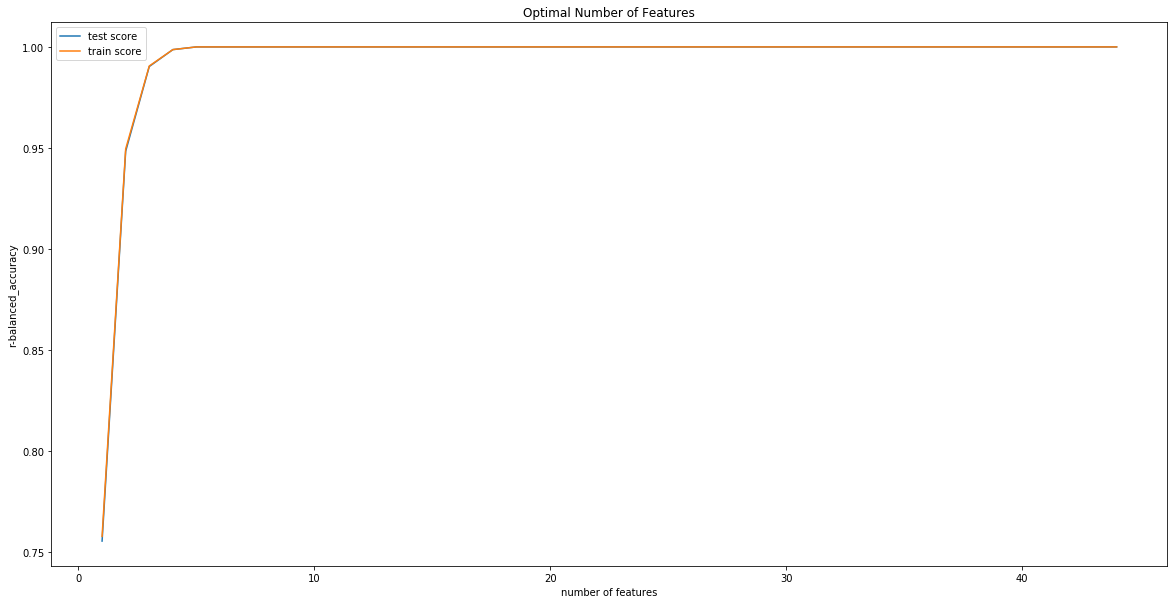

In [48]:
# plotting cv results
plt.figure(figsize=(20,10))

plt.plot(cv_result["param_n_features_to_select"], cv_result["mean_test_score"])
plt.plot(cv_result["param_n_features_to_select"], cv_result["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-balanced_accuracy')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

## RFE Linear

In [49]:
# create a cv scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#range of hypermeters
hyper_params = [{'n_features_to_select': list(range(1,53))}]

# grid search
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds, verbose = 1, return_train_score=True)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [50]:
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.669653      0.041414         0.003988    2.219215e-06   
1        1.575496      0.133178         0.003790    7.464549e-04   
2        1.686418      0.104730         0.004388    4.885001e-04   
3        1.645366      0.064365         0.005385    4.306230e-03   
4        1.524439      0.121995         0.003790    3.988028e-04   
5        1.460581      0.080451         0.003790    3.989460e-04   
6        1.423232      0.045277         0.003989    1.092275e-03   
7        1.408080      0.024134         0.003790    3.988028e-04   
8        1.397665      0.034148         0.003990    2.780415e-07   
9        1.551514      0.089064         0.004189    9.770677e-04   
10       1.634439      0.057582         0.004588    4.889865e-04   
11       1.567827      0.064163         0.004389    4.887530e-04   
12       1.605278      0.061465         0.004787    7.465569e-04   
13       1.592403      0.096194         0.004889    6.603144e-04   
14       1.685856      0.062941         0.004787    7.463529e-04   
15       1.674451      0.070885         0.004588    7.976534e-04   
16       1.591388      0.093934         0.004588    4.885582e-04   
17       1.399132      0.041602         0.004389    4.885193e-04   
18       1.465657      0.030680         0.005187    1.163276e-03   
19       1.505194      0.272011         0.004588    4.886945e-04   
20       2.014532      0.299942         0.005586    2.239178e-03   
21       2.117456      0.296647         0.008181    3.493352e-03   
22       1.939053      0.324392         0.005186    3.988028e-04   
23       1.524705      0.126371         0.005487    1.338596e-03   
24       1.475986      0.048984         0.004588    7.976532e-04   
25       1.291115      0.068277         0.005586    1.197251e-03   
26       1.684415      0.249812         0.005585    4.884611e-04   
27       1.471441      0.226316         0.004389    4.886750e-04   
28       1.397493      0.101829         0.005186    7.464549e-04   
29       1.226517      0.056918         0.004787    3.987074e-04   
30       1.301575      0.089732         0.005785    7.461490e-04   
31       1.123653      0.070534         0.005186    7.463784e-04   
32       1.253218      0.038441         0.004588    4.882858e-04   
33       1.101092      0.032731         0.005386    4.884025e-04   
34       1.016166      0.013478         0.005186    9.772137e-04   
35       0.966650      0.024423         0.004788    3.990174e-04   
36       0.927084      0.030281         0.004788    3.987313e-04   
37       0.940701      0.065411         0.005186    7.464167e-04   
38       1.122821      0.141164         0.005984    1.668839e-03   
39       0.957121      0.123167         0.004987    4.156970e-07   
40       0.728016      0.044441         0.005586    7.981300e-04   
41       0.684274      0.021998         0.004994    6.418883e-04   
42       0.624315      0.027623         0.005186    3.991604e-04   
43       0.581652      0.030771         0.005585    4.886945e-04   
44       0.519908      0.015825         0.004987    6.309018e-04   
45       0.469368      0.023260         0.005386    1.017084e-03   
46       0.417103      0.013337         0.005186    3.988031e-04   
47       0.353270      0.011788         0.005186    3.987075e-04   
48       0.300371      0.019863         0.005785    1.162581e-03   
49       0.230104      0.011060         0.005373    4.994532e-04   
50       0.169454      0.016790         0.005386    4.884803e-04   
51       0.098442      0.024256         0.005386    7.977247e-04   

   param_n_features_to_select                        params  \
0                           1   {'n_features_to_select': 1}   
1                           2   {'n_features_to_select': 2}   
2                           3   {'n_features_to_select': 3}   
3                           4   {'n_features_to_select': 4}   
4                           5   {'n_features_to_select': 5}   
5                    

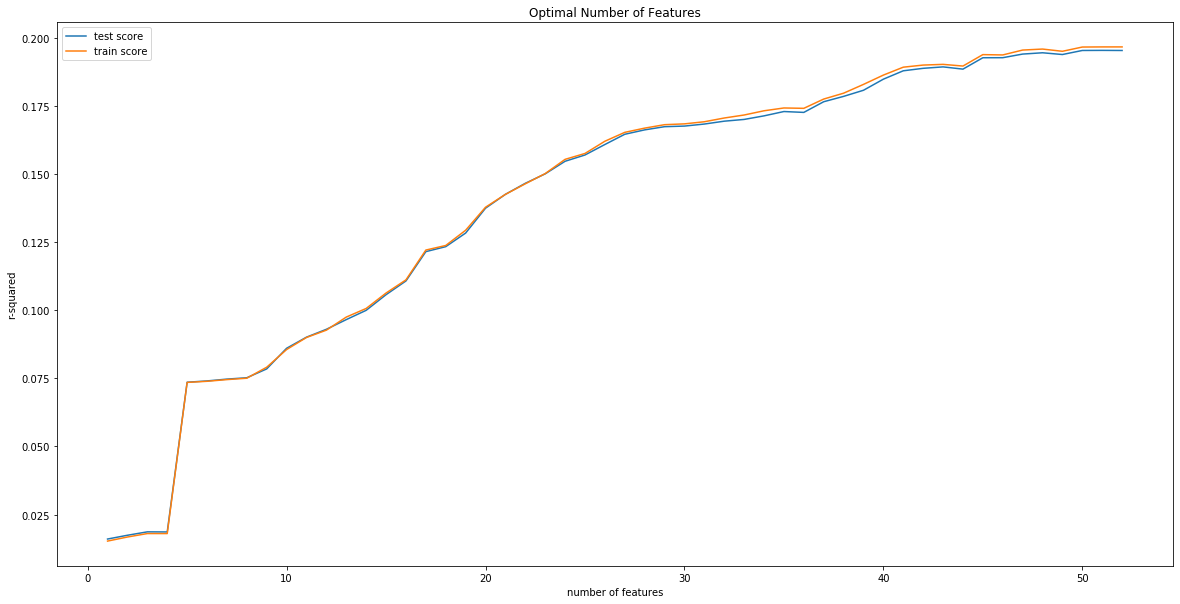

In [51]:
# plotting cv results
plt.figure(figsize=(20,10))

plt.plot(cv_result["param_n_features_to_select"], cv_result["mean_test_score"])
plt.plot(cv_result["param_n_features_to_select"], cv_result["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [52]:
X_train.columns

Index(['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP', 'PUMA_103',
       'PUMA_104', 'PUMA_105', 'ESR_4.0', 'JWTRNS_2.0', 'JWTRNS_3.0',
       'JWTRNS_4.0', 'JWTRNS_5.0', 'JWTRNS_6.0', 'JWTRNS_7.0', 'JWTRNS_8.0',
       'JWTRNS_9.0', 'JWTRNS_10.0', 'JWTRNS_11.0', 'JWTRNS_12.0', 'FER_2.0',
       'MIL_2.0', 'MIL_3.0', 'MIL_4.0', 'SEX_2', 'SCHL_3.0', 'SCHL_5.0',
       'SCHL_6.0', 'SCHL_7.0', 'SCHL_8.0', 'SCHL_9.0', 'SCHL_10.0',
       'SCHL_11.0', 'SCHL_12.0', 'SCHL_13.0', 'SCHL_14.0', 'SCHL_15.0',
       'SCHL_16.0', 'SCHL_17.0', 'SCHL_18.0', 'SCHL_19.0', 'SCHL_20.0',
       'SCHL_21.0', 'SCHL_22.0', 'SCHL_23.0', 'SCHL_24.0', 'DIS_2', 'HICOV_2',
       'ACCESS_2.0', 'ACCESS_3.0'],
      dtype='object')

## Decision Tree

In [53]:
y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

In [54]:
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

fi_col = []
fi = []

for i,column in enumerate(df.drop(['ASSISTANCE'], axis = 'columns')):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for AGEP is : 0.07079082012585329
The feature importance for JWMNP is : 0.07156743054643118
The feature importance for WKHP is : 0.08262952073642084
The feature importance for ELEP is : 0.09858833105829583
The feature importance for RNTP is : 0.1535721906214694
The feature importance for WATP is : 0.1506302475462173
The feature importance for PERNP is : 0.18919199211896706
The feature importance for PUMA_103 is : 0.0
The feature importance for PUMA_104 is : 0.012949940121530064
The feature importance for PUMA_105 is : 0.0064235160857022315
The feature importance for ESR_4.0 is : 0.0
The feature importance for JWTRNS_2.0 is : 0.0
The feature importance for JWTRNS_3.0 is : 0.0032723791452608326
The feature importance for JWTRNS_4.0 is : 0.001800103688451807
The feature importance for JWTRNS_5.0 is : 0.0
The feature importance for JWTRNS_6.0 is : 0.0
The feature importance for JWTRNS_7.0 is : 0.0
The feature importance for JWTRNS_8.0 is : 0.0
The feature importance 

In [55]:
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()
fi_df = fi_df[fi_df["Feature Importance"] > 0]
fi_df

index      Feature  Feature Importance
0       6        PERNP            0.189192
1       4         RNTP            0.153572
2       5         WATP            0.150630
3       3         ELEP            0.098588
4       2         WKHP            0.082630
5       1        JWMNP            0.071567
6       0         AGEP            0.070791
7      39    SCHL_16.0            0.024825
8      44    SCHL_21.0            0.019681
9      42    SCHL_19.0            0.016417
10     26        SEX_2            0.015623
11     41    SCHL_18.0            0.015022
12      8     PUMA_104            0.012950
13     22      FER_2.0            0.011033
14     20  JWTRNS_11.0            0.009842
15     35    SCHL_12.0            0.009360
16     32     SCHL_9.0            0.008992
17     23      MIL_2.0            0.008751
18     18   JWTRNS_9.0            0.007526
19     21  JWTRNS_12.0            0.006633
20      9     PUMA_105            0.006424
21     45    SCHL_22.0            0.004880
22     12   JWTRNS_3.0            0.003272
23     13   JWTRNS_4.0            0.001800

In [56]:
selected = ["PERNP", "ELEP", "RNTP", "WATP", "JWMNP", "AGEP", "WKHP", "SCHL", "PUMA", "FER", "SEX", "JWTRNS"]

In [57]:
selected

['PERNP',
 'ELEP',
 'RNTP',
 'WATP',
 'JWMNP',
 'AGEP',
 'WKHP',
 'SCHL',
 'PUMA',
 'FER',
 'SEX',
 'JWTRNS']

## Model

In [123]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

y = df["ASSISTANCE"]
X = df[selected]

In [124]:
X.head()

PERNP  ELEP  RNTP    WATP  JWMNP  AGEP  WKHP  SCHL  PUMA  FER  SEX  \
6848  180000.0  90.0   0.0  1600.0   45.0    39  40.0  24.0   104  2.0    2   
6849  180000.0  90.0   0.0  1600.0   45.0    39  40.0  24.0   104  2.0    2   
6850  180000.0  90.0   0.0  1600.0   45.0    39  40.0  24.0   104  2.0    2   
6851  180000.0  90.0   0.0  1600.0   45.0    39  40.0  24.0   104  2.0    2   
6852  180000.0  90.0   0.0  1600.0   45.0    39  40.0  24.0   104  2.0    2   

      JWTRNS  
6848     1.0  
6849     1.0  
6850     1.0  
6851     1.0  
6852     1.0

In [125]:
# summarize class distribution
print(Counter(y))
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.1)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

Counter({0.0: 295534, 1.0: 21656})
Counter({0.0: 295534, 1.0: 29553})
Counter({0.0: 59106, 1.0: 29553})


In [126]:
df = pd.concat([y,X], axis = 1, join = "inner")

In [6]:
def remOutliers(df, cat, y):
    for col in df.columns:
        if (col not in cat) and (col != y):
            #print("DataFrame starting size " + str(len(df)))
            #print(col + " outliers being removed... ")
            mean = np.mean(df[col], axis=0)
            sd = np.std(df[col], axis=0)
            df = df[df[col] > mean - (2*sd)].copy()
            df = df[df[col] < mean + (2*sd)].copy()
            #print("DataFrame new size " + str(len(df)))
        else:
            #print(col + " is not a numerical feature, skipping... ")
            pass
    return df

In [128]:
df = remOutliers(df)

In [129]:
numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'JWTRNS', 'FER', 'SEX', 'SCHL']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

In [130]:
# split 70-30
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

In [131]:
#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

In [132]:
X_train.columns

Index(['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP', 'PUMA_103',
       'PUMA_104', 'PUMA_105', 'JWTRNS_2.0', 'JWTRNS_3.0', 'JWTRNS_4.0',
       'JWTRNS_5.0', 'JWTRNS_6.0', 'JWTRNS_7.0', 'JWTRNS_8.0', 'SEX_2',
       'SCHL_11.0', 'SCHL_12.0', 'SCHL_13.0', 'SCHL_14.0', 'SCHL_15.0',
       'SCHL_16.0', 'SCHL_17.0', 'SCHL_18.0', 'SCHL_19.0', 'SCHL_20.0',
       'SCHL_21.0', 'SCHL_22.0', 'SCHL_23.0', 'SCHL_24.0'],
      dtype='object')

In [133]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [134]:
ns_probs = [0 for _ in range(len(y_test))]

In [135]:
print(confusion_matrix(y_test,y_pred))

[[9723 1348]
 [3304 2172]]


In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81     11071
         1.0       0.62      0.40      0.48      5476

    accuracy                           0.72     16547
   macro avg       0.68      0.64      0.64     16547
weighted avg       0.70      0.72      0.70     16547



In [137]:
print(balanced_accuracy_score(y_test,y_pred))

0.6374401655718561


In [112]:
Counter(y)

Counter({0.0: 59106, 1.0: 29553})

In [113]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.646


In [114]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

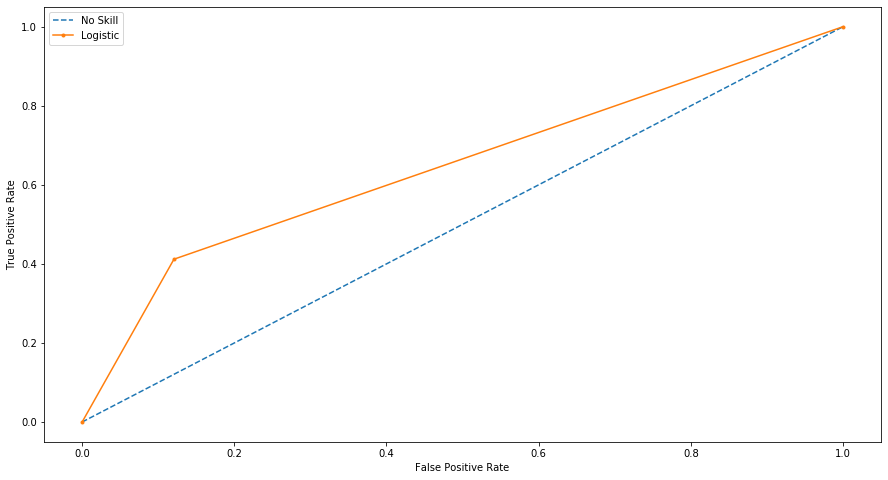

In [117]:
# plot the roc curve for the model
fig = plt.figure(figsize = (15,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 175380})
Counter({0.0: 194866, 1.0: 175380})
[[43530 14957]
 [12918 39669]]
              precision    recall  f1-score   support

         0.0       0.77      0.74      0.76     58487
         1.0       0.73      0.75      0.74     52587

    accuracy                           0.75    111074
   macro avg       0.75      0.75      0.75    111074
weighted avg       0.75      0.75      0.75    111074

 balanced accuracy score = 0.7493089456881628
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.749


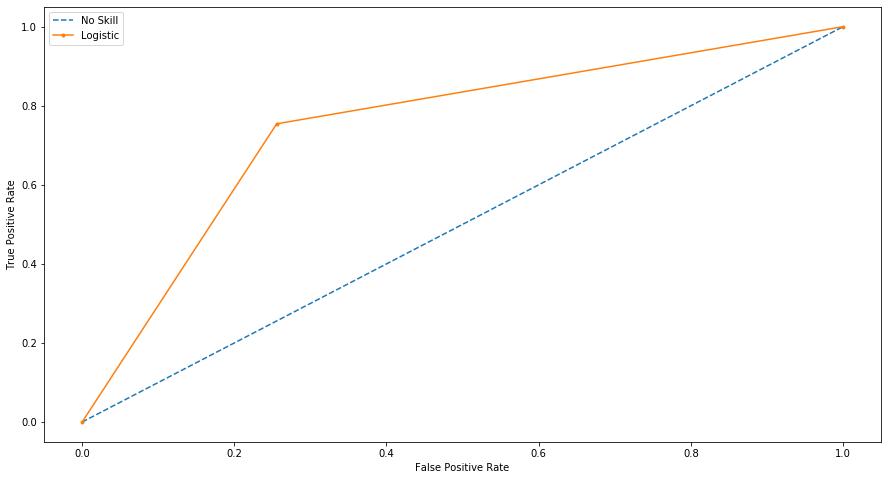

In [37]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.9
u = 0.9
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

# selected features
numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'JWTRNS', 'FER', 'SEX', 'SCHL']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 70-30
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
ns_probs = [0 for _ in range(len(y_test))]

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f' balanced accuracy score = {balanced_accuracy_score(y_test,y_pred)}')

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize = (15,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## all features

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 175380})
Counter({0.0: 194866, 1.0: 175380})
[[44029 14458]
 [12850 39737]]
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76     58487
         1.0       0.73      0.76      0.74     52587

    accuracy                           0.75    111074
   macro avg       0.75      0.75      0.75    111074
weighted avg       0.75      0.75      0.75    111074

0.7542213985579023
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.754


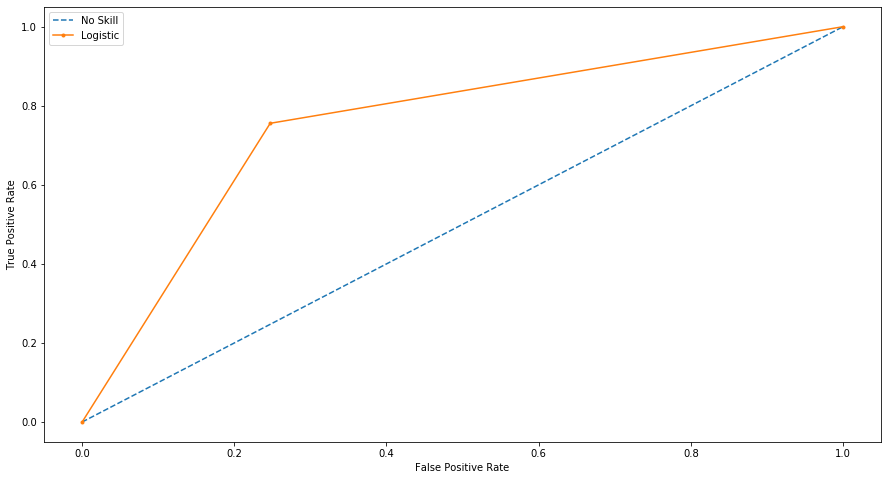

In [38]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.9
u = 0.9
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 70-30
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize = (15,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## L1 all feature

In [33]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.9
u = 0.9
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 70-30
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))
    print('')

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 175380})
Counter({0.0: 194866, 1.0: 175380})
C: 10
Coefficient of each feature: [[ -0.73759115   0.33687688   0.37790112   0.82171703   0.57269158
    0.45124738  -2.68635285  -1.05689709  -0.79129652  -0.17286679
   -6.92585656   0.68865364  -0.44643121  -0.19658963  -7.98132699
   -9.1455747   -0.24615565  -8.51711873   0.86394227  -1.80913405
   -0.57769476  -0.24735604  -1.50415657   2.82804993  -7.09876772
    1.6147578    0.45479644  -0.50721445  -9.22528911  -7.82722073
   -0.15430259 -10.27144337   0.41222461  -0.29355417 -10.48717782
    0.02556002  -0.9088295   -1.12299622  -2.44174043  -1.03020649
   -1.3226251   -1.7045214   -2.44359012  -2.07045621  -2.09601162
   -2.70613391  -0.14020408   0.56788343]]
Training accuracy: 0.616771873504854
Test accuracy: 0.6179844067918685

C: 1
Coefficient of each feature: [[-0.73736699  0.33515346  0.37491399  0.82080799  0.57338163  0.45212154
  -2.68531257 -1.05632092 -0.790

## L1 with decision tree feature importance

In [34]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.9
u = 0.9
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'JWTRNS', 'FER', 'SEX', 'SCHL']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 70-30
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))
    print('')

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 175380})
Counter({0.0: 194866, 1.0: 175380})
C: 10
Coefficient of each feature: [[ -0.54756968   0.37871505   0.63468505   0.67348845   0.64838319
    0.65388789  -3.00558574  -1.10094618  -0.84785228  -0.17553771
    0.68747453  -0.48066385  -0.24576847  -8.25084228  -9.20452319
   -0.36618973  -8.58342575   0.72793924  -1.89483003  -0.4923062
   -0.1425808   -1.57983695   0.39440461  -0.79472154  -9.14192757
   -7.99072388  -0.24371856  -9.95962302   0.23518393  -0.56568728
  -10.5568906   -0.06816767  -1.02950229  -1.1692679   -2.49964072
   -1.11878175  -1.48680862  -1.80921059  -2.52185579  -2.19445311
   -2.21238603  -2.78066773]]
Training accuracy: 0.5980622906795487
Test accuracy: 0.5968813583736968

C: 1
Coefficient of each feature: [[-0.54776994  0.37661056  0.63185317  0.67266504  0.64910161  0.65484029
  -3.00452983 -1.10045795 -0.84690331 -0.17457808  0.68743956 -0.47925437
  -0.24253251 -5.94535812 -6.90113006 

## L2 all feature

In [19]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.3
u = 0.9
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 70-30
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

C = [10, 1, .1, .001, 0.0001]

for c in C:
    clf = LogisticRegression(penalty='l2', C=c, solver='newton-cg')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))
    print('')

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 58460})
Counter({0.0: 64955, 1.0: 58460})
C: 10
Coefficient of each feature: [[-7.32950541e-01  2.80693307e-01  3.34781579e-01  7.83589119e-01
   5.93135798e-01  4.58436863e-01 -2.61709599e+00 -1.03959993e+00
  -7.79629923e-01 -1.94237381e-01 -3.39205673e+00  6.89659593e-01
  -4.39551988e-01 -2.97263402e-01 -5.31164420e+00 -6.21913400e+00
  -2.73111886e-01 -5.78558677e+00  8.32650541e-01 -1.80218415e+00
  -5.71431828e-01 -3.48675730e-01 -1.52506766e+00  4.04934956e+00
  -3.56769078e+00  2.91054179e+00  4.48676701e-01 -3.98372528e-01
  -6.38576460e+00 -5.07089837e+00  4.30619969e-03 -7.20027000e+00
   4.14692120e-01 -1.68049277e-01 -7.38180865e+00 -6.43821774e-02
  -8.59052203e-01 -1.07546529e+00 -2.24247266e+00 -9.51589633e-01
  -1.24453767e+00 -1.61642544e+00 -2.38326722e+00 -1.99655385e+00
  -2.11973838e+00 -2.64383965e+00 -1.23231084e-01  6.30721584e-01]]
Training accuracy: 0.6772427364278273
Test accuracy: 0.680378122889

## L2 with decision tree feature importance

In [20]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.3
u = 0.9
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'JWTRNS', 'FER', 'SEX', 'SCHL']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 70-30
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

C = [10, 1, .1, .001, 0.0001]

for c in C:
    clf = LogisticRegression(penalty='l2', C=c, solver='newton-cg')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))
    print('')

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 58460})
Counter({0.0: 64955, 1.0: 58460})
C: 10
Coefficient of each feature: [[-0.51829246  0.42302231  0.56098326  0.72994223  0.6553863   0.64874977
  -3.03216428 -1.1227705  -0.80634897 -0.17001382  0.6775359  -0.46869769
  -0.22973658 -5.39348712 -6.28302183 -0.20331352 -5.73579311  0.69492701
  -1.91280452 -0.48795771 -0.39439207 -1.6526782   0.37715662 -0.82955168
  -6.12808564 -5.16989932 -0.25444646 -6.82675237  0.16976284 -0.60868353
  -7.5032823   0.10301999 -0.95185015 -1.19282975 -2.51114963 -1.08034612
  -1.48392641 -1.87161819 -2.51216256 -2.18697253 -2.09499617 -2.707643  ]]
Training accuracy: 0.6139830998958212
Test accuracy: 0.6142336259284268

C: 1
Coefficient of each feature: [[-0.52164854  0.40866977  0.54639624  0.72672876  0.66093027  0.65590147
  -3.02340799 -1.12122082 -0.8030701  -0.16648111  0.67791151 -0.46075626
  -0.22424505 -3.49791419 -4.34039768 -0.20942475 -3.80968887  0.68920191
  -1.8963245

## Over Under Loop with Decision tree feature important

In [30]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y_main = df["ASSISTANCE"]
X_main = df.drop(columns="ASSISTANCE")

oversampling = []
undersampling = []
balanced_acc = []

for i in range(3,11):
    i = i*0.1
    for j in range(3,11):
        j = j*0.1
    
        o = i
        u = j
        # define oversampling strategy
        over = RandomOverSampler(sampling_strategy=o)
        # fit and apply the transform
        X, y = over.fit_resample(X_main, y_main)
        # define undersampling strategy
        under = RandomUnderSampler(sampling_strategy=u)
        # fit and apply the transform
        X, y = under.fit_resample(X_main, y_main)
    
        df = pd.concat([y,X], axis = 1, join = "inner")
    
        numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
        cat = df.loc[:,['PUMA', 'JWTRNS', 'FER', 'SEX', 'SCHL']].copy()
        for col in cat:
            cat[col] = cat[col].astype('category')
    
        df_cat = pd.get_dummies(cat, drop_first = True)
        df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

        # split 70-30
        df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

        #rescale
        scaler = MinMaxScaler()
        nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
        df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
        #rescale testset
        df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
        y_train = df_train.pop('ASSISTANCE')
        X_train = df_train
        y_test = df_test.pop('ASSISTANCE')
        X_test = df_test

        # Create a scaler object
        sc = StandardScaler()

        # Fit the scaler to the training data and transform
        X_train_std = sc.fit_transform(X_train)

        # Apply the scaler to the test data
        X_test_std = sc.transform(X_test)
    
        c = 0.001
        logreg = LogisticRegression(penalty='l2', C=c, solver='newton-cg')
        logreg.fit(X_train_std, y_train)
        y_pred = logreg.predict(X_test_std)
        b_acc = balanced_accuracy_score(y_test,y_pred)

        oversampling.append(i)
        undersampling.append(j)
        balanced_acc.append(b_acc)
    

In [31]:
dfx = pd.DataFrame(list(zip(oversampling, undersampling, balanced_acc)),
               columns =['oversampling', 'undersampling', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

oversampling  undersampling  balanced_acc
0            0.9            0.9      0.754840
1            0.4            0.9      0.749080
2            0.9            0.7      0.748115
3            0.5            0.7      0.747323
4            0.4            1.0      0.746751
..           ...            ...           ...
59           0.3            0.3      0.599979
60           0.9            0.3      0.599419
61           0.5            0.3      0.598335
62           0.7            0.3      0.598157
63           0.8            0.3      0.596113

[64 rows x 3 columns]

## Over Under Loop with all feature

In [41]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y_main = df["ASSISTANCE"]
X_main = df.drop(columns="ASSISTANCE")

oversampling = []
undersampling = []
balanced_acc = []

for i in range(3,11):
    i = i*0.1
    for j in range(3,11):
        j = j*0.1
    
        o = i
        u = j
        # define oversampling strategy
        over = RandomOverSampler(sampling_strategy=o)
        # fit and apply the transform
        X, y = over.fit_resample(X_main, y_main)
        # define undersampling strategy
        under = RandomUnderSampler(sampling_strategy=u)
        # fit and apply the transform
        X, y = under.fit_resample(X_main, y_main)
    
        df = pd.concat([y,X], axis = 1, join = "inner")
    
        numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
        cat = df.loc[:,['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
        for col in cat:
            cat[col] = cat[col].astype('category')
    
        df_cat = pd.get_dummies(cat, drop_first = True)
        df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

        # split 70-30
        df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

        #rescale
        scaler = MinMaxScaler()
        nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
        df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
        #rescale testset
        df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
        y_train = df_train.pop('ASSISTANCE')
        X_train = df_train
        y_test = df_test.pop('ASSISTANCE')
        X_test = df_test

        # Create a scaler object
        sc = StandardScaler()

        # Fit the scaler to the training data and transform
        X_train_std = sc.fit_transform(X_train)

        # Apply the scaler to the test data
        X_test_std = sc.transform(X_test)
    
        c = 0.001
        logreg = LogisticRegression(penalty='l2', C=c, solver='newton-cg')
        logreg.fit(X_train_std, y_train)
        y_pred = logreg.predict(X_test_std)
        b_acc = balanced_accuracy_score(y_test,y_pred)

        oversampling.append(i)
        undersampling.append(j)
        balanced_acc.append(b_acc)
    

In [42]:
dfx = pd.DataFrame(list(zip(oversampling, undersampling, balanced_acc)),
               columns =['oversampling', 'undersampling', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

oversampling  undersampling  balanced_acc
0            0.3            1.0      0.765327
1            0.6            1.0      0.760183
2            0.4            1.0      0.754697
3            0.8            1.0      0.754017
4            0.7            0.7      0.753743
..           ...            ...           ...
59           1.0            0.3      0.618066
60           0.8            0.3      0.617844
61           0.9            0.3      0.617766
62           0.6            0.3      0.615678
63           0.3            0.3      0.614505

[64 rows x 3 columns]

## Over Under Loop with all feature w/o Reg

In [43]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y_main = df["ASSISTANCE"]
X_main = df.drop(columns="ASSISTANCE")

oversampling = []
undersampling = []
balanced_acc = []

for i in range(3,11):
    i = i*0.1
    for j in range(3,11):
        j = j*0.1
    
        o = i
        u = j
        # define oversampling strategy
        over = RandomOverSampler(sampling_strategy=o)
        # fit and apply the transform
        X, y = over.fit_resample(X_main, y_main)
        # define undersampling strategy
        under = RandomUnderSampler(sampling_strategy=u)
        # fit and apply the transform
        X, y = under.fit_resample(X_main, y_main)
    
        df = pd.concat([y,X], axis = 1, join = "inner")
    
        numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
        cat = df.loc[:,['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
        for col in cat:
            cat[col] = cat[col].astype('category')
    
        df_cat = pd.get_dummies(cat, drop_first = True)
        df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

        # split 70-30
        df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

        #rescale
        scaler = MinMaxScaler()
        nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
        df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
        #rescale testset
        df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
        y_train = df_train.pop('ASSISTANCE')
        X_train = df_train
        y_test = df_test.pop('ASSISTANCE')
        X_test = df_test

        # Create a scaler object
        sc = StandardScaler()

        # Fit the scaler to the training data and transform
        X_train_std = sc.fit_transform(X_train)

        # Apply the scaler to the test data
        X_test_std = sc.transform(X_test)
    
        c = 0.001
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        b_acc = balanced_accuracy_score(y_test,y_pred)

        oversampling.append(i)
        undersampling.append(j)
        balanced_acc.append(b_acc)
    

In [44]:
dfx = pd.DataFrame(list(zip(oversampling, undersampling, balanced_acc)),
               columns =['oversampling', 'undersampling', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

oversampling  undersampling  balanced_acc
0            0.8            1.0      0.766482
1            0.3            1.0      0.764877
2            0.5            0.9      0.761932
3            0.7            0.9      0.761090
4            0.3            0.9      0.760115
..           ...            ...           ...
59           1.0            0.3      0.665999
60           0.9            0.3      0.663701
61           0.4            0.3      0.661786
62           0.3            0.3      0.661725
63           0.7            0.3      0.653507

[64 rows x 3 columns]

## Over Under Loop with all decision tree feature important w/o Reg

In [45]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y_main = df["ASSISTANCE"]
X_main = df.drop(columns="ASSISTANCE")

oversampling = []
undersampling = []
balanced_acc = []

for i in range(3,11):
    i = i*0.1
    for j in range(3,11):
        j = j*0.1
    
        o = i
        u = j
        # define oversampling strategy
        over = RandomOverSampler(sampling_strategy=o)
        # fit and apply the transform
        X, y = over.fit_resample(X_main, y_main)
        # define undersampling strategy
        under = RandomUnderSampler(sampling_strategy=u)
        # fit and apply the transform
        X, y = under.fit_resample(X_main, y_main)
    
        df = pd.concat([y,X], axis = 1, join = "inner")
    
        numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
        cat = df.loc[:,['PUMA', 'JWTRNS', 'FER', 'SEX', 'SCHL']].copy()
        for col in cat:
            cat[col] = cat[col].astype('category')
    
        df_cat = pd.get_dummies(cat, drop_first = True)
        df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

        # split 70-30
        df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

        #rescale
        scaler = MinMaxScaler()
        nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
        df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
        #rescale testset
        df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
        y_train = df_train.pop('ASSISTANCE')
        X_train = df_train
        y_test = df_test.pop('ASSISTANCE')
        X_test = df_test

        # Create a scaler object
        sc = StandardScaler()

        # Fit the scaler to the training data and transform
        X_train_std = sc.fit_transform(X_train)

        # Apply the scaler to the test data
        X_test_std = sc.transform(X_test)
    
        c = 0.001
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        b_acc = balanced_accuracy_score(y_test,y_pred)

        oversampling.append(i)
        undersampling.append(j)
        balanced_acc.append(b_acc)
    

In [46]:
dfx = pd.DataFrame(list(zip(oversampling, undersampling, balanced_acc)),
               columns =['oversampling', 'undersampling', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

oversampling  undersampling  balanced_acc
0            0.3            0.7      0.763776
1            0.7            0.7      0.759172
2            1.0            1.0      0.759090
3            1.0            0.7      0.756891
4            0.6            0.7      0.756602
..           ...            ...           ...
59           0.3            0.3      0.649696
60           0.7            0.3      0.647348
61           0.9            0.3      0.646565
62           1.0            0.3      0.645277
63           0.6            0.3      0.644267

[64 rows x 3 columns]

## Over Under Loop with all feature(w/o FER) w/o Reg

In [77]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y_main = df["ASSISTANCE"]
X_main = df.drop(columns="ASSISTANCE")

oversampling = []
undersampling = []
balanced_acc = []

for i in range(3,11):
    i = i*0.1
    for j in range(3,11):
        j = j*0.1
    
        o = i
        u = j
        # define oversampling strategy
        over = RandomOverSampler(sampling_strategy=o)
        # fit and apply the transform
        X, y = over.fit_resample(X_main, y_main)
        # define undersampling strategy
        under = RandomUnderSampler(sampling_strategy=u)
        # fit and apply the transform
        X, y = under.fit_resample(X_main, y_main)
    
        df = pd.concat([y,X], axis = 1, join = "inner")
    
        numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
        cat = df.loc[:,['PUMA', 'ESR', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
        for col in cat:
            cat[col] = cat[col].astype('category')
    
        df_cat = pd.get_dummies(cat, drop_first = True)
        df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

        # split 70-30
        df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

        #rescale
        scaler = MinMaxScaler()
        nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
        df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
        #rescale testset
        df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
        y_train = df_train.pop('ASSISTANCE')
        X_train = df_train
        y_test = df_test.pop('ASSISTANCE')
        X_test = df_test

        # Create a scaler object
        sc = StandardScaler()

        # Fit the scaler to the training data and transform
        X_train_std = sc.fit_transform(X_train)

        # Apply the scaler to the test data
        X_test_std = sc.transform(X_test)
    
        c = 0.001
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        b_acc = balanced_accuracy_score(y_test,y_pred)

        oversampling.append(i)
        undersampling.append(j)
        balanced_acc.append(b_acc)
    

In [78]:
dfx = pd.DataFrame(list(zip(oversampling, undersampling, balanced_acc)),
               columns =['oversampling', 'undersampling', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

oversampling  undersampling  balanced_acc
0            0.5            0.9      0.764331
1            0.6            0.7      0.758083
2            0.4            0.9      0.756227
3            0.9            0.9      0.755714
4            0.3            0.8      0.755648
..           ...            ...           ...
59           0.7            0.3      0.661636
60           0.4            0.3      0.660853
61           0.9            0.3      0.658659
62           0.5            0.3      0.651878
63           1.0            0.3      0.647266

[64 rows x 3 columns]

## Over Under Loop with all feature(w/o WKHP) w/o Reg

In [50]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y_main = df["ASSISTANCE"]
X_main = df.drop(columns="ASSISTANCE")

oversampling = []
undersampling = []
balanced_acc = []

for i in range(3,11):
    i = i*0.1
    for j in range(3,11):
        j = j*0.1
    
        o = i
        u = j
        # define oversampling strategy
        over = RandomOverSampler(sampling_strategy=o)
        # fit and apply the transform
        X, y = over.fit_resample(X_main, y_main)
        # define undersampling strategy
        under = RandomUnderSampler(sampling_strategy=u)
        # fit and apply the transform
        X, y = under.fit_resample(X_main, y_main)
    
        df = pd.concat([y,X], axis = 1, join = "inner")
    
        numerical = df.loc[:,['AGEP', 'JWMNP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
        cat = df.loc[:,['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
        for col in cat:
            cat[col] = cat[col].astype('category')
    
        df_cat = pd.get_dummies(cat, drop_first = True)
        df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

        # split 70-30
        df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

        #rescale
        scaler = MinMaxScaler()
        nu_var = ['AGEP', 'JWMNP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
        df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
        #rescale testset
        df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
        y_train = df_train.pop('ASSISTANCE')
        X_train = df_train
        y_test = df_test.pop('ASSISTANCE')
        X_test = df_test

        # Create a scaler object
        sc = StandardScaler()

        # Fit the scaler to the training data and transform
        X_train_std = sc.fit_transform(X_train)

        # Apply the scaler to the test data
        X_test_std = sc.transform(X_test)
    
        c = 0.001
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        b_acc = balanced_accuracy_score(y_test,y_pred)

        oversampling.append(i)
        undersampling.append(j)
        balanced_acc.append(b_acc)
    

In [51]:
dfx = pd.DataFrame(list(zip(oversampling, undersampling, balanced_acc)),
               columns =['oversampling', 'undersampling', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

oversampling  undersampling  balanced_acc
0            0.3            0.9      0.757732
1            0.6            0.9      0.757150
2            1.0            0.7      0.756889
3            0.3            1.0      0.754358
4            0.6            0.7      0.753858
..           ...            ...           ...
59           0.5            0.3      0.666873
60           0.8            0.3      0.666367
61           0.6            0.3      0.665475
62           1.0            0.3      0.662053
63           0.9            0.3      0.661114

[64 rows x 3 columns]

## Over Under Loop with all feature(w/o FER, WKHP) w/o Reg

In [52]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y_main = df["ASSISTANCE"]
X_main = df.drop(columns="ASSISTANCE")

oversampling = []
undersampling = []
balanced_acc = []

for i in range(3,11):
    i = i*0.1
    for j in range(3,11):
        j = j*0.1
    
        o = i
        u = j
        # define oversampling strategy
        over = RandomOverSampler(sampling_strategy=o)
        # fit and apply the transform
        X, y = over.fit_resample(X_main, y_main)
        # define undersampling strategy
        under = RandomUnderSampler(sampling_strategy=u)
        # fit and apply the transform
        X, y = under.fit_resample(X_main, y_main)
    
        df = pd.concat([y,X], axis = 1, join = "inner")
    
        numerical = df.loc[:,['AGEP', 'JWMNP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
        cat = df.loc[:,['PUMA', 'ESR', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
        for col in cat:
            cat[col] = cat[col].astype('category')
    
        df_cat = pd.get_dummies(cat, drop_first = True)
        df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

        # split 70-30
        df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

        #rescale
        scaler = MinMaxScaler()
        nu_var = ['AGEP', 'JWMNP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
        df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
        #rescale testset
        df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
        y_train = df_train.pop('ASSISTANCE')
        X_train = df_train
        y_test = df_test.pop('ASSISTANCE')
        X_test = df_test

        # Create a scaler object
        sc = StandardScaler()

        # Fit the scaler to the training data and transform
        X_train_std = sc.fit_transform(X_train)

        # Apply the scaler to the test data
        X_test_std = sc.transform(X_test)
    
        c = 0.001
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        b_acc = balanced_accuracy_score(y_test,y_pred)

        oversampling.append(i)
        undersampling.append(j)
        balanced_acc.append(b_acc)
    

In [53]:
dfx = pd.DataFrame(list(zip(oversampling, undersampling, balanced_acc)),
               columns =['oversampling', 'undersampling', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

oversampling  undersampling  balanced_acc
0            0.4            0.9      0.759157
1            0.5            0.8      0.755170
2            0.5            1.0      0.754130
3            1.0            1.0      0.751939
4            0.8            1.0      0.750904
..           ...            ...           ...
59           0.9            0.3      0.662427
60           0.8            0.3      0.654415
61           0.3            0.3      0.653922
62           0.5            0.3      0.651195
63           0.7            0.3      0.650839

[64 rows x 3 columns]

## Over Under Loop with decision tree feature important(w/o FER) w/o Reg

In [54]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y_main = df["ASSISTANCE"]
X_main = df.drop(columns="ASSISTANCE")

oversampling = []
undersampling = []
balanced_acc = []

for i in range(3,11):
    i = i*0.1
    for j in range(3,11):
        j = j*0.1
    
        o = i
        u = j
        # define oversampling strategy
        over = RandomOverSampler(sampling_strategy=o)
        # fit and apply the transform
        X, y = over.fit_resample(X_main, y_main)
        # define undersampling strategy
        under = RandomUnderSampler(sampling_strategy=u)
        # fit and apply the transform
        X, y = under.fit_resample(X_main, y_main)
    
        df = pd.concat([y,X], axis = 1, join = "inner")
    
        numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
        cat = df.loc[:,['PUMA', 'JWTRNS', 'SEX', 'SCHL']].copy()
        for col in cat:
            cat[col] = cat[col].astype('category')
    
        df_cat = pd.get_dummies(cat, drop_first = True)
        df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

        # split 70-30
        df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

        #rescale
        scaler = MinMaxScaler()
        nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
        df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
        #rescale testset
        df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
        y_train = df_train.pop('ASSISTANCE')
        X_train = df_train
        y_test = df_test.pop('ASSISTANCE')
        X_test = df_test

        # Create a scaler object
        sc = StandardScaler()

        # Fit the scaler to the training data and transform
        X_train_std = sc.fit_transform(X_train)

        # Apply the scaler to the test data
        X_test_std = sc.transform(X_test)
    
        c = 0.001
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        b_acc = balanced_accuracy_score(y_test,y_pred)

        oversampling.append(i)
        undersampling.append(j)
        balanced_acc.append(b_acc)
    

In [55]:
dfx = pd.DataFrame(list(zip(oversampling, undersampling, balanced_acc)),
               columns =['oversampling', 'undersampling', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

oversampling  undersampling  balanced_acc
0            0.5            0.7      0.761457
1            0.8            0.7      0.759330
2            1.0            0.7      0.757708
3            0.7            0.9      0.756921
4            0.7            0.7      0.756574
..           ...            ...           ...
59           0.7            0.3      0.645988
60           0.6            0.3      0.644966
61           1.0            0.3      0.644904
62           0.8            0.3      0.644549
63           0.3            0.3      0.643527

[64 rows x 3 columns]

## all feature(w/o FER) w/o Reg best acc = 0.764  (o = 0.6 / u = 1.0)
 
## decision tree feature important(w/o FER) w/o Reg best acc = 0.761 (o = 0.5 / u = 0.7)

## Over Under Loop with all feature(w/o FER, ESR) w/o Reg

In [62]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y_main = df["ASSISTANCE"]
X_main = df.drop(columns="ASSISTANCE")

oversampling = []
undersampling = []
balanced_acc = []

for i in range(3,11):
    i = i*0.1
    for j in range(3,11):
        j = j*0.1
    
        o = i
        u = j
        # define oversampling strategy
        over = RandomOverSampler(sampling_strategy=o)
        # fit and apply the transform
        X, y = over.fit_resample(X_main, y_main)
        # define undersampling strategy
        under = RandomUnderSampler(sampling_strategy=u)
        # fit and apply the transform
        X, y = under.fit_resample(X_main, y_main)
    
        df = pd.concat([y,X], axis = 1, join = "inner")
    
        numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
        cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
        for col in cat:
            cat[col] = cat[col].astype('category')
    
        df_cat = pd.get_dummies(cat, drop_first = True)
        df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

        # split 70-30
        df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

        #rescale
        scaler = MinMaxScaler()
        nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
        df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
        #rescale testset
        df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
        y_train = df_train.pop('ASSISTANCE')
        X_train = df_train
        y_test = df_test.pop('ASSISTANCE')
        X_test = df_test

        # Create a scaler object
        sc = StandardScaler()

        # Fit the scaler to the training data and transform
        X_train_std = sc.fit_transform(X_train)

        # Apply the scaler to the test data
        X_test_std = sc.transform(X_test)
    
        c = 0.001
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        b_acc = balanced_accuracy_score(y_test,y_pred)

        oversampling.append(i)
        undersampling.append(j)
        balanced_acc.append(b_acc)
    

In [63]:
dfx = pd.DataFrame(list(zip(oversampling, undersampling, balanced_acc)),
               columns =['oversampling', 'undersampling', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

oversampling  undersampling  balanced_acc
0            0.3            1.0      0.765665
1            1.0            1.0      0.765643
2            0.7            0.7      0.758133
3            1.0            0.9      0.757968
4            0.5            1.0      0.755455
..           ...            ...           ...
59           0.8            0.3      0.662586
60           0.7            0.3      0.660392
61           0.3            0.3      0.650501
62           0.4            0.3      0.649132
63           0.6            0.3      0.648332

[64 rows x 3 columns]

## Over Under Loop with all feature(w/o FER, ESR, MIL) w/o Reg

In [67]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y_main = df["ASSISTANCE"]
X_main = df.drop(columns="ASSISTANCE")

oversampling = []
undersampling = []
balanced_acc = []

for i in range(3,11):
    i = i*0.1
    for j in range(3,11):
        j = j*0.1
    
        o = i
        u = j
        # define oversampling strategy
        over = RandomOverSampler(sampling_strategy=o)
        # fit and apply the transform
        X, y = over.fit_resample(X_main, y_main)
        # define undersampling strategy
        under = RandomUnderSampler(sampling_strategy=u)
        # fit and apply the transform
        X, y = under.fit_resample(X_main, y_main)
    
        df = pd.concat([y,X], axis = 1, join = "inner")
    
        numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
        cat = df.loc[:,['PUMA', 'JWTRNS', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
        for col in cat:
            cat[col] = cat[col].astype('category')
    
        df_cat = pd.get_dummies(cat, drop_first = True)
        df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

        # split 70-30
        df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

        #rescale
        scaler = MinMaxScaler()
        nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
        df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
        #rescale testset
        df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
        y_train = df_train.pop('ASSISTANCE')
        X_train = df_train
        y_test = df_test.pop('ASSISTANCE')
        X_test = df_test

        # Create a scaler object
        sc = StandardScaler()

        # Fit the scaler to the training data and transform
        X_train_std = sc.fit_transform(X_train)

        # Apply the scaler to the test data
        X_test_std = sc.transform(X_test)
    
        c = 0.001
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        b_acc = balanced_accuracy_score(y_test,y_pred)

        oversampling.append(i)
        undersampling.append(j)
        balanced_acc.append(b_acc)


In [68]:
dfx = pd.DataFrame(list(zip(oversampling, undersampling, balanced_acc)),
               columns =['oversampling', 'undersampling', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

oversampling  undersampling  balanced_acc
0            0.3            0.7      0.753115
1            0.4            0.8      0.752443
2            1.0            0.9      0.751806
3            0.8            0.8      0.751406
4            0.6            0.9      0.750599
..           ...            ...           ...
59           0.7            0.3      0.663342
60           0.9            0.3      0.662436
61           0.4            0.3      0.662214
62           0.3            0.3      0.650349
63           1.0            0.3      0.649993

[64 rows x 3 columns]

## Over Under Loop with all feature(w/o FER, ESR, DIS) w/o Reg

In [71]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y_main = df["ASSISTANCE"]
X_main = df.drop(columns="ASSISTANCE")

oversampling = []
undersampling = []
balanced_acc = []

for i in range(3,11):
    i = i*0.1
    for j in range(3,11):
        j = j*0.1
    
        o = i
        u = j
        # define oversampling strategy
        over = RandomOverSampler(sampling_strategy=o)
        # fit and apply the transform
        X, y = over.fit_resample(X_main, y_main)
        # define undersampling strategy
        under = RandomUnderSampler(sampling_strategy=u)
        # fit and apply the transform
        X, y = under.fit_resample(X_main, y_main)
    
        df = pd.concat([y,X], axis = 1, join = "inner")
    
        numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
        cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'HICOV', 'ACESS']].copy()
        for col in cat:
            cat[col] = cat[col].astype('category')
    
        df_cat = pd.get_dummies(cat, drop_first = True)
        df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

        # split 70-30
        df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

        #rescale
        scaler = MinMaxScaler()
        nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
        df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
        #rescale testset
        df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
        y_train = df_train.pop('ASSISTANCE')
        X_train = df_train
        y_test = df_test.pop('ASSISTANCE')
        X_test = df_test

        # Create a scaler object
        sc = StandardScaler()

        # Fit the scaler to the training data and transform
        X_train_std = sc.fit_transform(X_train)

        # Apply the scaler to the test data
        X_test_std = sc.transform(X_test)
    
        c = 0.001
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        b_acc = balanced_accuracy_score(y_test,y_pred)

        oversampling.append(i)
        undersampling.append(j)
        balanced_acc.append(b_acc)
    

In [72]:
dfx = pd.DataFrame(list(zip(oversampling, undersampling, balanced_acc)),
               columns =['oversampling', 'undersampling', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

oversampling  undersampling  balanced_acc
0            1.0            0.9      0.760458
1            0.6            0.8      0.757341
2            0.4            0.9      0.756678
3            0.3            0.8      0.755893
4            0.7            1.0      0.754722
..           ...            ...           ...
59           0.3            0.3      0.660703
60           0.4            0.3      0.659770
61           0.5            0.3      0.649504
62           0.8            0.3      0.649371
63           0.9            0.3      0.646377

[64 rows x 3 columns]

## Over Under Loop with all feature(w/o FER, ESR, HICOV) w/o Reg

In [75]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y_main = df["ASSISTANCE"]
X_main = df.drop(columns="ASSISTANCE")

oversampling = []
undersampling = []
balanced_acc = []

for i in range(3,11):
    i = i*0.1
    for j in range(3,11):
        j = j*0.1
    
        o = i
        u = j
        # define oversampling strategy
        over = RandomOverSampler(sampling_strategy=o)
        # fit and apply the transform
        X, y = over.fit_resample(X_main, y_main)
        # define undersampling strategy
        under = RandomUnderSampler(sampling_strategy=u)
        # fit and apply the transform
        X, y = under.fit_resample(X_main, y_main)
    
        df = pd.concat([y,X], axis = 1, join = "inner")
    
        numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
        cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'ACESS']].copy()
        for col in cat:
            cat[col] = cat[col].astype('category')
    
        df_cat = pd.get_dummies(cat, drop_first = True)
        df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

        # split 70-30
        df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

        #rescale
        scaler = MinMaxScaler()
        nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
        df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
        #rescale testset
        df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
        y_train = df_train.pop('ASSISTANCE')
        X_train = df_train
        y_test = df_test.pop('ASSISTANCE')
        X_test = df_test

        # Create a scaler object
        sc = StandardScaler()

        # Fit the scaler to the training data and transform
        X_train_std = sc.fit_transform(X_train)

        # Apply the scaler to the test data
        X_test_std = sc.transform(X_test)
    
        c = 0.001
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        b_acc = balanced_accuracy_score(y_test,y_pred)

        oversampling.append(i)
        undersampling.append(j)
        balanced_acc.append(b_acc)
    

In [76]:
dfx = pd.DataFrame(list(zip(oversampling, undersampling, balanced_acc)),
               columns =['oversampling', 'undersampling', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

oversampling  undersampling  balanced_acc
0            1.0            1.0      0.763917
1            0.3            0.9      0.763906
2            0.7            1.0      0.761437
3            0.7            0.7      0.757341
4            0.8            0.7      0.756144
..           ...            ...           ...
59           0.9            0.3      0.645632
60           0.6            0.3      0.645232
61           0.4            0.3      0.644966
62           0.7            0.3      0.644388
63           1.0            0.3      0.643305

[64 rows x 3 columns]

## Over Under Loop with all feature(w/o FER, ESR, ACCESS) w/o Reg

In [81]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y_main = df["ASSISTANCE"]
X_main = df.drop(columns="ASSISTANCE")

oversampling = []
undersampling = []
balanced_acc = []

for i in range(3,11):
    i = i*0.1
    for j in range(3,11):
        j = j*0.1
    
        o = i
        u = j
        # define oversampling strategy
        over = RandomOverSampler(sampling_strategy=o)
        # fit and apply the transform
        X, y = over.fit_resample(X_main, y_main)
        # define undersampling strategy
        under = RandomUnderSampler(sampling_strategy=u)
        # fit and apply the transform
        X, y = under.fit_resample(X_main, y_main)
    
        df = pd.concat([y,X], axis = 1, join = "inner")
    
        numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
        cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV']].copy()
        for col in cat:
            cat[col] = cat[col].astype('category')
    
        df_cat = pd.get_dummies(cat, drop_first = True)
        df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

        # split 70-30
        df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

        #rescale
        scaler = MinMaxScaler()
        nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
        df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
        #rescale testset
        df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
        y_train = df_train.pop('ASSISTANCE')
        X_train = df_train
        y_test = df_test.pop('ASSISTANCE')
        X_test = df_test

        # Create a scaler object
        sc = StandardScaler()

        # Fit the scaler to the training data and transform
        X_train_std = sc.fit_transform(X_train)

        # Apply the scaler to the test data
        X_test_std = sc.transform(X_test)
    
        c = 0.001
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        b_acc = balanced_accuracy_score(y_test,y_pred)

        oversampling.append(i)
        undersampling.append(j)
        balanced_acc.append(b_acc)
 

In [82]:
dfx = pd.DataFrame(list(zip(oversampling, undersampling, balanced_acc)),
               columns =['oversampling', 'undersampling', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

oversampling  undersampling  balanced_acc
0            0.4            0.9      0.762331
1            0.8            0.7      0.758295
2            1.0            0.8      0.754588
3            1.0            1.0      0.754030
4            0.8            0.9      0.753132
..           ...            ...           ...
59           0.7            0.3      0.661386
60           0.6            0.3      0.654367
61           0.8            0.3      0.650110
62           0.9            0.3      0.648021
63           0.3            0.3      0.647888

[64 rows x 3 columns]

## Over Under Loop with all feature(w/o FER, ESR) w/o Reg (Best so far)

In [85]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y_main = df["ASSISTANCE"]
X_main = df.drop(columns="ASSISTANCE")

oversampling = []
undersampling = []
balanced_acc = []

for i in range(3,11):
    i = i*0.1
    for j in range(3,11):
        j = j*0.1
    
        o = i
        u = j
        # define oversampling strategy
        over = RandomOverSampler(sampling_strategy=o)
        # fit and apply the transform
        X, y = over.fit_resample(X_main, y_main)
        # define undersampling strategy
        under = RandomUnderSampler(sampling_strategy=u)
        # fit and apply the transform
        X, y = under.fit_resample(X_main, y_main)
    
        df = pd.concat([y,X], axis = 1, join = "inner")
    
        numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
        cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
        for col in cat:
            cat[col] = cat[col].astype('category')
    
        df_cat = pd.get_dummies(cat, drop_first = True)
        df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

        # split 70-30
        df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

        #rescale
        scaler = MinMaxScaler()
        nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
        df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
        #rescale testset
        df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
        y_train = df_train.pop('ASSISTANCE')
        X_train = df_train
        y_test = df_test.pop('ASSISTANCE')
        X_test = df_test

        # Create a scaler object
        sc = StandardScaler()

        # Fit the scaler to the training data and transform
        X_train_std = sc.fit_transform(X_train)

        # Apply the scaler to the test data
        X_test_std = sc.transform(X_test)
    
        c = 0.001
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        b_acc = balanced_accuracy_score(y_test,y_pred)

        oversampling.append(i)
        undersampling.append(j)
        balanced_acc.append(b_acc)


In [86]:
dfx = pd.DataFrame(list(zip(oversampling, undersampling, balanced_acc)),
               columns =['oversampling', 'undersampling', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

oversampling  undersampling  balanced_acc
0            0.4            1.0      0.769023
1            1.0            0.7      0.756763
2            0.5            0.8      0.754113
3            0.6            0.7      0.753974
4            0.3            0.9      0.753008
..           ...            ...           ...
59           1.0            0.3      0.661831
60           0.6            0.3      0.661164
61           0.9            0.3      0.660170
62           0.4            0.3      0.650154
63           0.5            0.3      0.646749

[64 rows x 3 columns]

## Over Under Loop with all feature(w/o FER, ESR) w/o Reg(o = 0.4 / u = 1.0) (Best so far)

## L1 all feature(w/o FER,ESR) w/o Reg(o = 0.4 / u = 1.0)

In [87]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.4
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 70-30
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))
    print('')

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 77946})
Counter({0.0: 77946, 1.0: 77946})
C: 10
Coefficient of each feature: [[-0.73144889  0.23286273  0.28891722  0.85880098  0.55450087  0.45291214
  -2.72568737 -0.99874623 -0.77459981 -0.17709047  0.68191244 -0.45800491
  -0.1655787  -7.31042827 -8.32346025 -0.0536865  -7.60138031  0.80995281
  -1.80999482 -0.67130783 -0.33814414  5.85015503 -3.15313754  4.66466499
   0.49414445 -0.53580046 -8.48452275 -7.03845525 -0.15319031 -9.57748708
   0.4244043  -0.3097527  -9.70044487  0.04218429 -0.94944025 -1.13990874
  -2.56138192 -1.00138268 -1.38531951 -1.74012393 -2.39909352 -2.0772527
  -2.12985233 -2.76061178 -0.16729261  0.54139617]]
Training accuracy: 0.7094772918881272
Test accuracy: 0.7067225453301402

C: 1
Coefficient of each feature: [[-0.73200898  0.22798789  0.28115986  0.85604976  0.55528586  0.45446654
  -2.72292387 -0.99786255 -0.77274717 -0.17548638  0.6816972  -0.45480637
  -0.15838309 -5.00114213 -6.01840964

## L2 all feature(w/o FER,ESR) w/o Reg(o = 0.4 / u = 1.0)

In [89]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.4
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA','JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 70-30
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

C = [10, 1, .1, .001, 0.0001]

for c in C:
    clf = LogisticRegression(penalty='l2', C=c, solver='newton-cg')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))
    print('')

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 77946})
Counter({0.0: 77946, 1.0: 77946})
C: 10
Coefficient of each feature: [[-0.79831962  0.26207674  0.31622416  0.86570847  0.555761    0.49828761
  -2.64450534 -1.01352903 -0.84614587 -0.17210168  0.69811104 -0.46859205
  -0.12732337 -5.54376707 -6.50420548 -0.26597204 -5.81261328  0.81558072
  -1.86846292 -0.63210763 -0.05436518  6.60330519 -1.7344862   5.45042215
   0.52394555 -0.45250176 -6.54440372 -5.15614829 -0.12274853 -7.32005841
   0.31701931 -0.23960837 -7.51989601  0.1291241  -0.84065404 -1.10316757
  -2.39782477 -0.95392346 -1.34647316 -1.68370495 -2.38140085 -2.06291999
  -2.10835138 -2.79558541 -0.1590564   0.52404453]]
Training accuracy: 0.7127671273047176
Test accuracy: 0.7128592199794731

C: 1
Coefficient of each feature: [[-0.7977136   0.25318113  0.30616005  0.86299553  0.56056794  0.5058468
  -2.63991999 -1.01320076 -0.84450442 -0.17035979  0.6981199  -0.46388653
  -0.12443656 -3.64094911 -4.55029975

## Both L1 and L2 not working. Best one still all feature(w/o FER, ESR) w/o Reg(o = 0.4 / u = 1.0)

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 77946})
Counter({0.0: 77946, 1.0: 77946})
[[17022  6429]
 [ 4676 18641]]
              precision    recall  f1-score   support

         0.0       0.78      0.73      0.75     23451
         1.0       0.74      0.80      0.77     23317

    accuracy                           0.76     46768
   macro avg       0.76      0.76      0.76     46768
weighted avg       0.76      0.76      0.76     46768

0.7626567649420605
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.763


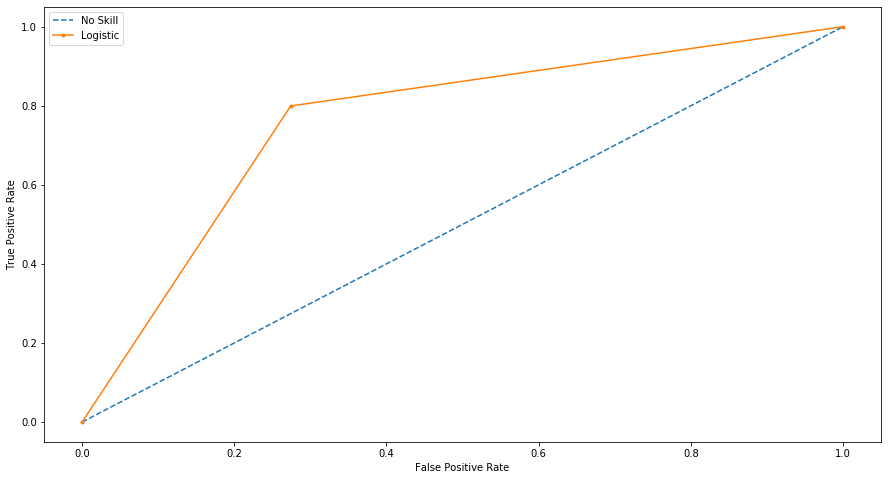

In [100]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.4
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 70-30
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize = (15,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Loop oversampling from 0.3 to 0.4

In [125]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y_main = df["ASSISTANCE"]
X_main = df.drop(columns="ASSISTANCE")

oversampling = []
undersampling = []
balanced_acc = []

for i in range(30,41):
    i = i*0.01   
    o = i
    
    j = 1
    u = j
    # define oversampling strategy
    over = RandomOverSampler(sampling_strategy=o)
    # fit and apply the transform
    X, y = over.fit_resample(X_main, y_main)
    # define undersampling strategy
    under = RandomUnderSampler(sampling_strategy=u)
    # fit and apply the transform
    X, y = under.fit_resample(X_main, y_main)
    
    df = pd.concat([y,X], axis = 1, join = "inner")
    
    numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
    cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
    for col in cat:
        cat[col] = cat[col].astype('category')
    
    df_cat = pd.get_dummies(cat, drop_first = True)
    df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

    # split 70-30
    df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

    #rescale
    scaler = MinMaxScaler()
    nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
    df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
    #rescale testset
    df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
    y_train = df_train.pop('ASSISTANCE')
    X_train = df_train
    y_test = df_test.pop('ASSISTANCE')
    X_test = df_test

    # Create a scaler object
    sc = StandardScaler()

    # Fit the scaler to the training data and transform
    X_train_std = sc.fit_transform(X_train)

    # Apply the scaler to the test data
    X_test_std = sc.transform(X_test)
    
    c = 0.001
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    b_acc = balanced_accuracy_score(y_test,y_pred)

    oversampling.append(i)
    undersampling.append(j)
    balanced_acc.append(b_acc)


In [126]:
dfx = pd.DataFrame(list(zip(oversampling, undersampling, balanced_acc)),
               columns =['oversampling', 'undersampling', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

oversampling  undersampling  balanced_acc
0           0.35              1      0.760682
1           0.34              1      0.758472
2           0.36              1      0.748291
3           0.32              1      0.747708
4           0.40              1      0.747224
5           0.38              1      0.746370
6           0.37              1      0.746249
7           0.39              1      0.745227
8           0.30              1      0.743188
9           0.33              1      0.740534
10          0.31              1      0.734798

## Best Oversample around 0.3 to 0.4 go with 0.35

## Best one still all feature(w/o FER, ESR) w/o Reg(o = 0.35 / u = 1.0)

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 68203})
Counter({0.0: 68203, 1.0: 68203})
[[14905  5465]
 [ 4722 15830]]
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.75     20370
         1.0       0.74      0.77      0.76     20552

    accuracy                           0.75     40922
   macro avg       0.75      0.75      0.75     40922
weighted avg       0.75      0.75      0.75     40922

0.7509773214603406
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.751


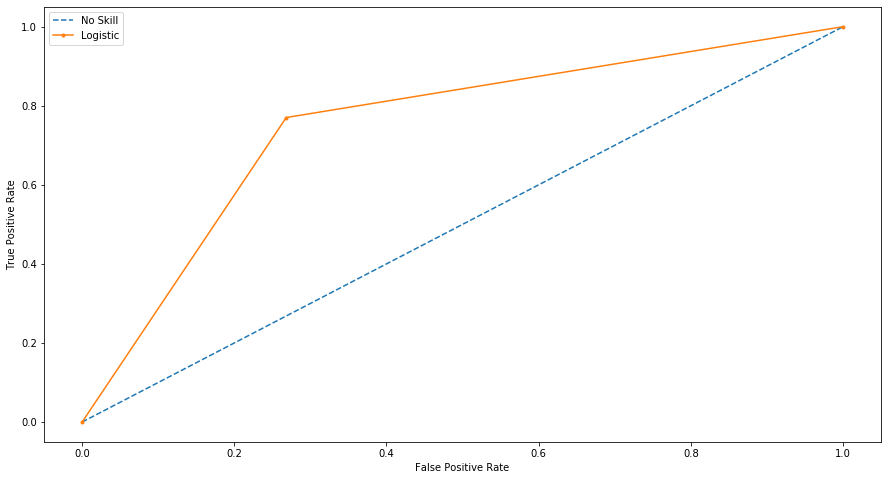

In [227]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.35
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 70-30
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize = (15,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [171]:
split = [[0.9, 0.1], [0.85, 0.15], [0.8, 0.2], [0.75, 0.25], [0.7, 0.3], [0.65, 0.35], [0.6, 0.4]]

In [172]:
for i in split:
    print(i)

[0.9, 0.1]
[0.85, 0.15]
[0.8, 0.2]
[0.75, 0.25]
[0.7, 0.3]
[0.65, 0.35]
[0.6, 0.4]


In [175]:
split[0][1]

0.1

## Loop with train/test split

In [200]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.35
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

split = [[0.9, 0.1], [0.85, 0.15], [0.8, 0.2], [0.75, 0.25], [0.7, 0.3], [0.65, 0.35], [0.6, 0.4]]

train_split = []
test_split = []
balanced_acc = []

for i in split:
    # split
    df_train, df_test = train_test_split(df, train_size = i[0], test_size = i[1], random_state = 100, shuffle = True)
    
    #rescale
    scaler = MinMaxScaler()
    nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
    df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
    #rescale testset
    df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
    y_train = df_train.pop('ASSISTANCE')
    X_train = df_train
    y_test = df_test.pop('ASSISTANCE')
    X_test = df_test
    
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    
    acc = balanced_accuracy_score(y_test,y_pred)
    train_split.append(i[0])
    test_split.append(i[1])
    balanced_acc.append(acc)
    

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 68203})
Counter({0.0: 68203, 1.0: 68203})


In [201]:
dfx = pd.DataFrame(list(zip(train_split, test_split, balanced_acc)),
               columns =['train_split', 'test_split', 'balanced_acc'])
dfx = dfx.sort_values('balanced_acc', ascending = False).reset_index(drop = True)
dfx

train_split  test_split  balanced_acc
0         0.60        0.40      0.767126
1         0.65        0.35      0.766181
2         0.70        0.30      0.765895
3         0.90        0.10      0.765736
4         0.75        0.25      0.765720
5         0.80        0.20      0.764332
6         0.85        0.15      0.763024

## 60/40 is the best for balanced_accuracy

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 68203})
Counter({0.0: 68203, 1.0: 68203})
[[20006  7227]
 [ 5542 21788]]
              precision    recall  f1-score   support

         0.0       0.78      0.73      0.76     27233
         1.0       0.75      0.80      0.77     27330

    accuracy                           0.77     54563
   macro avg       0.77      0.77      0.77     54563
weighted avg       0.77      0.77      0.77     54563

0.765921303936625
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.766


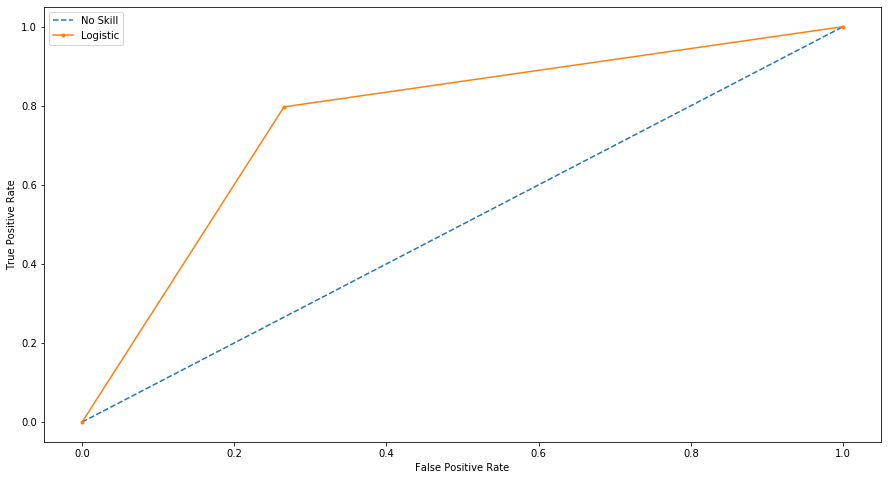

In [226]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.35
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 60-40
df_train, df_test = train_test_split(df, train_size = 0.60, test_size = 0.40, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize = (15,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [235]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.35
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 60-40
df_train, df_test = train_test_split(df, train_size = 0.60, test_size = 0.40, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 68203})
Counter({0.0: 68203, 1.0: 68203})
Best: 0.752946 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.752469 (0.006389) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.752029 (0.006294) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.752469 (0.006389) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.752473 (0.006459) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.751700 (0.006248) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.752465 (0.006453) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.751553 (0.005713) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.751805 (0.005989) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.751402 (0.005573) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.752946 (0.006017) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.752889 (0.005879) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfg

## Include both 2019 and 2018 datasets

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 68203})
Counter({0.0: 68203, 1.0: 68203})
[[19998  7235]
 [ 5901 21429]]
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75     27233
         1.0       0.75      0.78      0.77     27330

    accuracy                           0.76     54563
   macro avg       0.76      0.76      0.76     54563
weighted avg       0.76      0.76      0.76     54563

0.7592065491828597
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.759


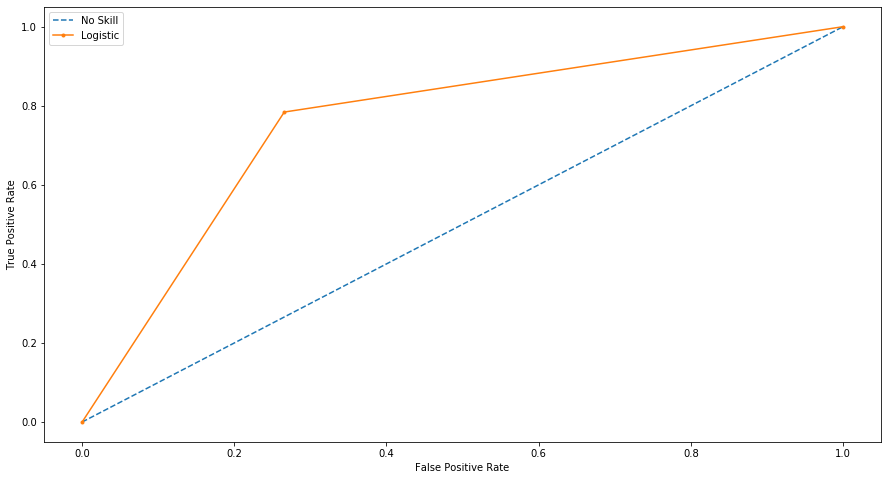

In [359]:
df = pd.concat([pca191_Ok, pca181_Ok], axis = 0).reindex()
df = df.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.35
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 60-40
df_train, df_test = train_test_split(df, train_size = 0.60, test_size = 0.40, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize = (15,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Best one so far

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 68203})
Counter({0.0: 68203, 1.0: 68203})
[[19925  7308]
 [ 5138 22192]]
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76     27233
         1.0       0.75      0.81      0.78     27330

    accuracy                           0.77     54563
   macro avg       0.77      0.77      0.77     54563
weighted avg       0.77      0.77      0.77     54563

0.7718252828926572
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.772


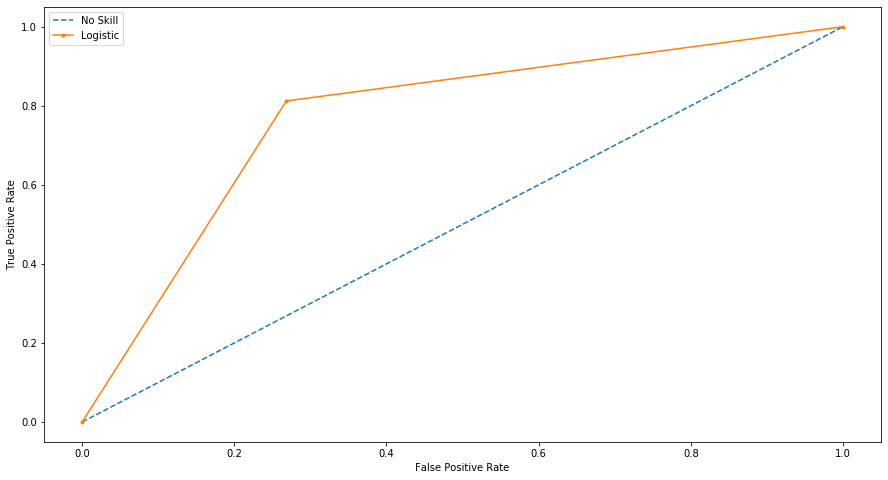

In [324]:
df = pd.concat([pca191_Ok, pca181_Ok], axis = 0).reindex()
df = df.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.35
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS', 'FER']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 60-40
df_train, df_test = train_test_split(df, train_size = 0.60, test_size = 0.40, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize = (15,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [285]:
df = pd.concat([pca191_Ok, pca181_Ok], axis = 0).reindex()
df = df.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.35
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 60-40
df_train, df_test = train_test_split(df, train_size = 0.60, test_size = 0.40, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 68203})
Counter({0.0: 68203, 1.0: 68203})
Best: 0.754473 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.752600 (0.006085) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.752363 (0.005738) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.752600 (0.006085) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.752510 (0.006112) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.752555 (0.006126) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.752542 (0.006075) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.751133 (0.005958) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.751166 (0.005952) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.751154 (0.005951) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.750111 (0.005208) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.750469 (0.005859) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbf

## Include 2016 2018 2019 datasets

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 68203})
Counter({0.0: 68203, 1.0: 68203})
[[19792  7441]
 [ 5968 21362]]
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75     27233
         1.0       0.74      0.78      0.76     27330

    accuracy                           0.75     54563
   macro avg       0.75      0.75      0.75     54563
weighted avg       0.75      0.75      0.75     54563

0.7541986139075016
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.754


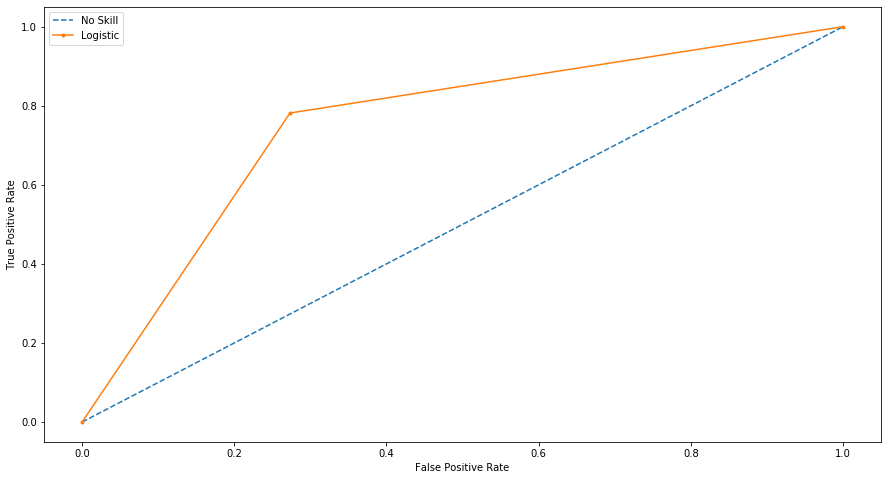

In [345]:
df = pd.concat([pca191_Ok, pca181_Ok, pca161_Ok], axis = 0).reindex()
df = df.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.35
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS', 'FER']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 60-40
df_train, df_test = train_test_split(df, train_size = 0.60, test_size = 0.40, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize = (15,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [346]:
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

len(df)

317190

In [350]:
df = pd.concat([pca191_Ok, pca181_Ok], axis = 0).reindex()
df = df.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]


len(df)

317190

In [351]:
df = pd.concat([pca191_Ok, pca181_Ok, pca161_Ok], axis = 0).reindex()
df = df.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]


len(df)

317190

In [353]:
df = pca181_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

len(df)

0

In [354]:
df = pca161_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df[' '].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

len(df)

0

In [361]:
df = pd.concat([pca191_Ok, pca181_Ok, pca161_Ok], axis = 0).reindex()
df = pca191_Ok.loc[:, ['PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

len(df)

206115

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 68203})
Counter({0.0: 68203, 1.0: 68203})
[[20588  6645]
 [ 5740 21590]]
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77     27233
         1.0       0.76      0.79      0.78     27330

    accuracy                           0.77     54563
   macro avg       0.77      0.77      0.77     54563
weighted avg       0.77      0.77      0.77     54563

0.772984476268669
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.773


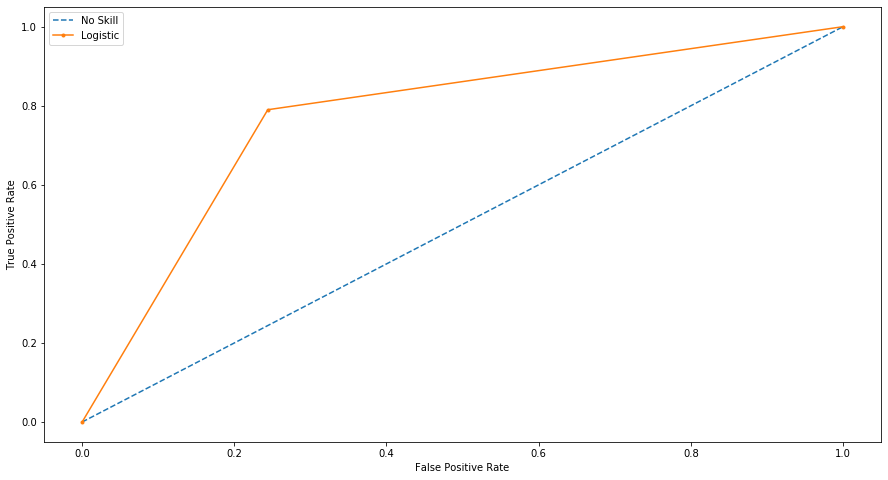

In [12]:
df = pd.concat([pca191_Ok, pca181_Ok], axis = 0).reindex()
df = df.loc[:, ['RACE', 'PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['RACE', 'PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.35
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['RACE', 'PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_cat = pd.get_dummies(cat, drop_first = True)
df = pd.concat([numerical, df_cat, y], axis = 1, join = "inner")

# split 60-40
df_train, df_test = train_test_split(df, train_size = 0.60, test_size = 0.40, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize = (15,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [13]:
coef = logreg.coef_.tolist()[0]

In [14]:
X_list = X_train.columns.tolist()

In [15]:
df_coef = pd.DataFrame(list(zip(X_list, coef)),
                    columns =['features', 'coefficients'])
df_coef['ABS'] = abs(df_coef.coefficients)
df_coef = df_coef.sort_values('ABS', ascending = False).reset_index(drop = True)

In [16]:
df_coef.drop(columns='ABS')

features  coefficients
0     SCHL_10.0     -5.877482
1     SCHL_13.0     -5.362239
2    JWTRNS_6.0     -4.785990
3       MIL_2.0      4.503821
4      SCHL_7.0     -4.200926
5    JWTRNS_8.0     -4.054289
6     SCHL_24.0     -3.557204
7         PERNP     -3.284640
8    JWTRNS_5.0     -3.202846
9       MIL_4.0      2.961717
10    SCHL_21.0     -2.784725
11    SCHL_22.0     -2.475265
12     SCHL_8.0     -2.436800
13    SCHL_23.0     -2.430106
14    SCHL_17.0     -2.395431
15    SCHL_20.0     -2.390964
16      MIL_3.0     -2.299613
17  JWTRNS_10.0     -2.128180
18    SCHL_19.0     -1.942148
19    SCHL_18.0     -1.547425
20    SCHL_15.0     -1.511880
21    SCHL_16.0     -1.362832
22  RACE_Latino     -1.309118
23   RACE_Other     -1.308152
24         AGEP     -1.105620
25      HICOV_2      0.946400
26         WKHP      0.859744
27         RNTP      0.847456
28   JWTRNS_9.0      0.801479
29     PUMA_103     -0.789541
30   JWTRNS_3.0     -0.684031
31         WATP      0.588437
32  JWTRNS_11.0     -0.553304
33   JWTRNS_2.0      0.543175
34     PUMA_104     -0.531388
35         ELEP      0.521124
36    SCHL_12.0     -0.498371
37   RACE_Asian      0.494240
38   JWTRNS_7.0     -0.486751
39        SEX_2      0.465413
40    SCHL_11.0     -0.383801
41        DIS_2     -0.316495
42        JWMNP      0.308287
43     SCHL_6.0     -0.216851
44    SCHL_14.0     -0.202101
45   RACE_White     -0.181151
46  JWTRNS_12.0      0.149054
47     PUMA_105     -0.123546
48   JWTRNS_4.0     -0.099862
49     SCHL_9.0      0.033540

In [390]:
df_coef = pd.DataFrame(list(zip(X_list, coef)),
                    columns =['features', 'coefficients'])
df_coef

features  coefficients
0          AGEP     -0.754183
1         JWMNP      0.321959
2          WKHP      0.403345
3          ELEP      0.833039
4          RNTP      0.551655
5          WATP      0.438232
6         PERNP     -2.624301
7      PUMA_103     -0.995436
8      PUMA_104     -0.709855
9      PUMA_105     -0.143492
10   JWTRNS_2.0      0.681425
11   JWTRNS_3.0     -0.481784
12   JWTRNS_4.0     -0.105842
13   JWTRNS_5.0     -3.409450
14   JWTRNS_6.0     -4.348783
15   JWTRNS_7.0     -0.259598
16   JWTRNS_8.0     -3.877333
17   JWTRNS_9.0      0.837877
18  JWTRNS_10.0     -1.912942
19  JWTRNS_11.0     -0.620431
20  JWTRNS_12.0     -0.255161
21      MIL_2.0      4.232354
22      MIL_3.0     -2.155529
23      MIL_4.0      3.132344
24        SEX_2      0.481207
25     SCHL_6.0     -0.487073
26     SCHL_7.0     -4.173954
27     SCHL_8.0     -2.986783
28     SCHL_9.0     -0.035160
29    SCHL_10.0     -5.228397
30    SCHL_11.0      0.507989
31    SCHL_12.0     -0.141856
32    SCHL_13.0     -5.320803
33    SCHL_14.0      0.418728
34    SCHL_15.0     -0.760853
35    SCHL_16.0     -0.994681
36    SCHL_17.0     -2.343998
37    SCHL_18.0     -0.861697
38    SCHL_19.0     -1.214557
39    SCHL_20.0     -1.555084
40    SCHL_21.0     -2.299730
41    SCHL_22.0     -1.948196
42    SCHL_23.0     -1.918519
43    SCHL_24.0     -2.587018
44        DIS_2     -0.145673
45      HICOV_2      0.602299
46      FER_2.0     -1.483638

In [19]:
df = pca191_Ok.loc[:, ['RACE','PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()
df = df[(df.SCHL >= 16)]
df = df[(df.JWTRNS != 6) | (df.JWTRNS != 12)]

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['RACE', 'ESR', 'JWTRNS', 'FER', 'SEX', 'SCHL', 'DIS', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.35
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['JWTRNS', 'SCHL', 'DIS', 'ACESS']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_race = df.loc[:,'RACE']
df_sex = df.loc[:,'SEX']
df_cat = pd.get_dummies(cat, drop_first = True)
df_race = pd.get_dummies(df_race)
df_sex = pd.get_dummies(df_sex)

Counter({0.0: 168630, 1.0: 6606})
Counter({0.0: 168630, 1.0: 59020})
Counter({0.0: 59020, 1.0: 59020})


In [20]:
df_sex

1  2
0       1  0
1       1  0
2       0  1
3       0  1
4       1  0
...    .. ..
118035  0  1
118036  0  1
118037  0  1
118038  0  1
118039  0  1

[118040 rows x 2 columns]

Counter({0.0: 168630, 1.0: 6606})
Counter({0.0: 168630, 1.0: 59020})
Counter({0.0: 59020, 1.0: 59020})
[[17513  5998]
 [ 5129 18576]]
              precision    recall  f1-score   support

         0.0       0.77      0.74      0.76     23511
         1.0       0.76      0.78      0.77     23705

    accuracy                           0.76     47216
   macro avg       0.76      0.76      0.76     47216
weighted avg       0.76      0.76      0.76     47216

0.7642587589606415
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.764


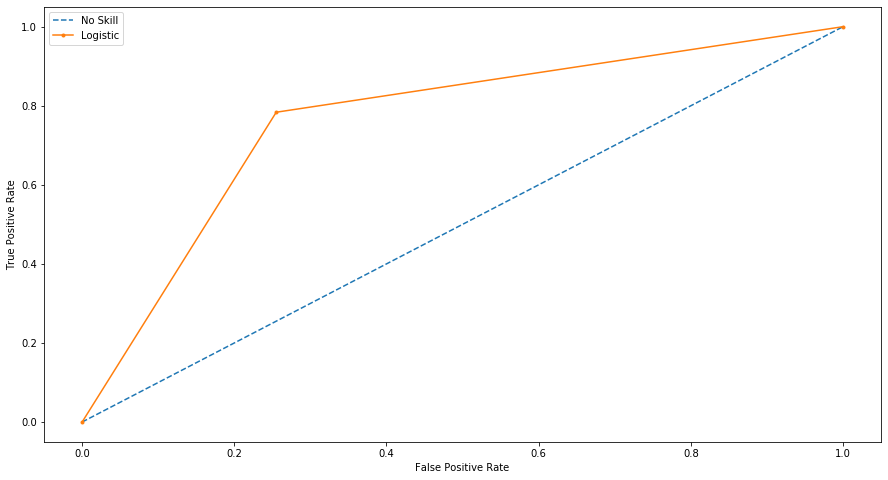

In [21]:
df = pca191_Ok.loc[:, ['RACE','PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()
df = df[(df.SCHL >= 16)]
df = df[(df.JWTRNS != 6) | (df.JWTRNS != 12)]

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['RACE', 'ESR', 'JWTRNS', 'FER', 'SEX', 'SCHL', 'DIS', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.35
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['JWTRNS', 'SCHL', 'DIS', 'ACESS']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_race = df.loc[:,'RACE']
df_sex = df.loc[:,'SEX']
df_cat = pd.get_dummies(cat, drop_first = True)
df_race = pd.get_dummies(df_race)
df_sex = pd.get_dummies(df_sex)
df_sex.columns = ["Male", "Female"]
df = pd.concat([numerical, df_cat, df_race, df_sex, y], axis = 1, join = "inner")
df = df.drop(columns="Other")

# split 60-40
df_train, df_test = train_test_split(df, train_size = 0.60, test_size = 0.40, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize = (15,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [22]:
coef = logreg.coef_.tolist()[0]
X_list = X_train.columns.tolist()
df_coef = pd.DataFrame(list(zip(X_list, coef)),
                    columns =['features', 'coefficients'])
df_coef['ABS'] = abs(df_coef.coefficients)
df_coef = df_coef.sort_values('ABS', ascending = False).reset_index(drop = True)
df_coef.drop(columns='ABS')

features  coefficients
0        JWTRNS_10.0     -5.565704
1              Asian      5.409792
2   African American      5.009053
3         JWTRNS_6.0     -4.707500
4              White      4.644026
5         JWTRNS_8.0     -4.444862
6         JWTRNS_5.0     -3.300518
7             Latino      3.217445
8              PERNP     -3.134587
9        JWTRNS_12.0     -2.981909
10         SCHL_24.0     -2.252825
11              AGEP     -1.483374
12         SCHL_21.0     -1.270725
13             DIS_2     -1.176550
14         SCHL_22.0     -0.844260
15        JWTRNS_3.0     -0.835614
16         SCHL_20.0     -0.716608
17       JWTRNS_11.0     -0.707067
18        JWTRNS_9.0      0.695525
19              Male     -0.676559
20        JWTRNS_2.0      0.659237
21         SCHL_23.0     -0.614825
22              RNTP      0.583515
23         SCHL_17.0     -0.515021
24        JWTRNS_7.0      0.340587
25         SCHL_19.0     -0.253013
26            Female     -0.243595
27              ELEP      0.212983
28         SCHL_18.0      0.199109
29              WKHP     -0.161881
30              WATP      0.121378
31        JWTRNS_4.0      0.097769
32             JWMNP      0.008928

In [9]:
df_coef[(df_coef.features == 'Asian') | (df_coef.features == 'African American') | (df_coef.features == 'White') | (df_coef.features == 'Latino')].drop(columns='ABS').sort_values('coefficients', ascending = False).reset_index(drop = True)

features  coefficients
0             Asian      1.745991
1  African American      1.231703
2             White      1.005000
3            Latino     -0.039946

In [449]:
logreg.intercept_

array([0.78153617])

In [444]:
df = pca191_Ok.loc[:, ['RACE','PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['RACE', 'PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.35
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()

df = pd.concat([y, numerical], axis = 1, join = "inner")

Counter({0.0: 194867, 1.0: 11248})
Counter({0.0: 194867, 1.0: 68203})
Counter({0.0: 68203, 1.0: 68203})


In [445]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Counter({0.0: 182726, 1.0: 14612})
Counter({0.0: 182726, 1.0: 63954})
Counter({0.0: 63954, 1.0: 63954})
[[16954  8581]
 [ 5493 20136]]
              precision    recall  f1-score   support

         0.0       0.76      0.66      0.71     25535
         1.0       0.70      0.79      0.74     25629

    accuracy                           0.72     51164
   macro avg       0.73      0.72      0.72     51164
weighted avg       0.73      0.72      0.72     51164

0.7248119597972005
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.725


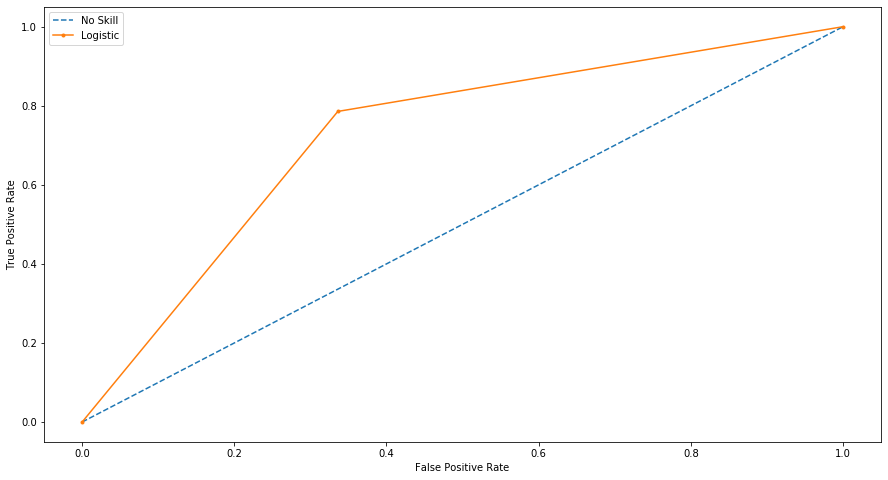

In [8]:
df = pca191_5_Ok.loc[:, ['RACE','PUMA', 'RELSHIPP', "AGEP", 'ESR', 'FER', 'JWMNP', 'JWTRNS', 'MIL', 'SCHL', 'SEX', "DIS",'HICOV', 'WKHP', 'ACCESS', 'ELEP', 'FULP', 'GASP', 'RNTP', 'WATP', 'PERNP', 'FS', 'FFSP', 'HINS4', 'PAP']].copy()
#Make new calculated column for dependent variable
df.loc[(df.FS == 1) | (df.FFSP == 1)| (df.HINS4 == 1) | (df.PAP > 0), "ASSISTANCE"] = 1
df.ASSISTANCE = df.ASSISTANCE.fillna(0)
#drop columns used to calculate predictor
df = df.drop(columns=['FS', 'FFSP', 'HINS4', 'PAP']).copy()

#Get rid of people not in the labor force and  people under 16
df = df.loc[(df.ESR != 6) & (df.AGEP >= 16)].copy()

df.FER = df.FER.fillna(2).copy()
df.JWMNP = df.JWMNP.fillna(0).copy()
df.WKHP = df.WKHP.fillna(0).copy()
df.RNTP = df.RNTP.fillna(0).copy()
df.WATP = df.WATP.fillna(0).copy()
df.MIL = df.MIL.fillna(4).copy()
df = df.loc[(df['ELEP'].notna()) & (df['JWTRNS'].notna())]
df = df.drop(columns=['FULP', 'GASP']).copy()

numericalCols = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
catCols = ['RACE', 'PUMA', 'ESR', 'JWTRNS', 'FER', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACCESS']

df = remOutliers(df, catCols, df.ASSISTANCE.name)

y = df["ASSISTANCE"]
X = df.drop(columns="ASSISTANCE")

# summarize class distribution
print(Counter(y))
o = 0.35
u = 1.0
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=o)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=u)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

df = pd.concat([y,X], axis = 1, join = "inner")

numerical = df.loc[:,['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']].copy()
cat = df.loc[:,['PUMA', 'JWTRNS', 'MIL', 'SEX', 'SCHL', 'DIS', 'HICOV', 'ACESS', 'FER']].copy()
for col in cat:
    cat[col] = cat[col].astype('category')
    
df_race = df.loc[:,'RACE']
df_cat = pd.get_dummies(cat, drop_first = True)
df_race = pd.get_dummies(df_race)
df = pd.concat([numerical, df_cat, df_race, y], axis = 1, join = "inner")

# split 60-40
df_train, df_test = train_test_split(df, train_size = 0.60, test_size = 0.40, random_state = 100, shuffle = True)

#rescale
scaler = MinMaxScaler()
nu_var = ['AGEP', 'JWMNP', 'WKHP', 'ELEP', 'RNTP', 'WATP', 'PERNP']
df_train[nu_var] = scaler.fit_transform(df_train[nu_var])
#rescale testset
df_test[nu_var] = scaler.fit_transform(df_test[nu_var])
y_train = df_train.pop('ASSISTANCE')
X_train = df_train
y_test = df_test.pop('ASSISTANCE')
X_test = df_test

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize = (15,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()